## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_name = f"seoul_covid_6_26_.csv"
file_name

'seoul_covid_6_26_.csv'

In [3]:
df = pd.read_csv(file_name)
df.shape

(1284, 7)

In [4]:
df = df.sort_values(["연번"], ascending=False)

In [5]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1284,12648,6.26.,관악구,-,왕성교회 관련,보라매병원
1,1283,12644,6.26.,관악구,-,왕성교회 관련,보라매병원
2,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-
3,1281,12639,6.26.,구로구,-,구로구 확진자 접촉,보라매병원
4,1280,12643,6.26.,은평구,이라크,해외 접촉 추정,서북병원


In [6]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1279,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1280,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1281,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1282,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1283,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [7]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

### 시각화 선명하게 설정하기

In [8]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 거주지별 확진자

In [9]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    107
구로구     84
강남구     82
강서구     78
양천구     69
Name: 거주지, dtype: int64

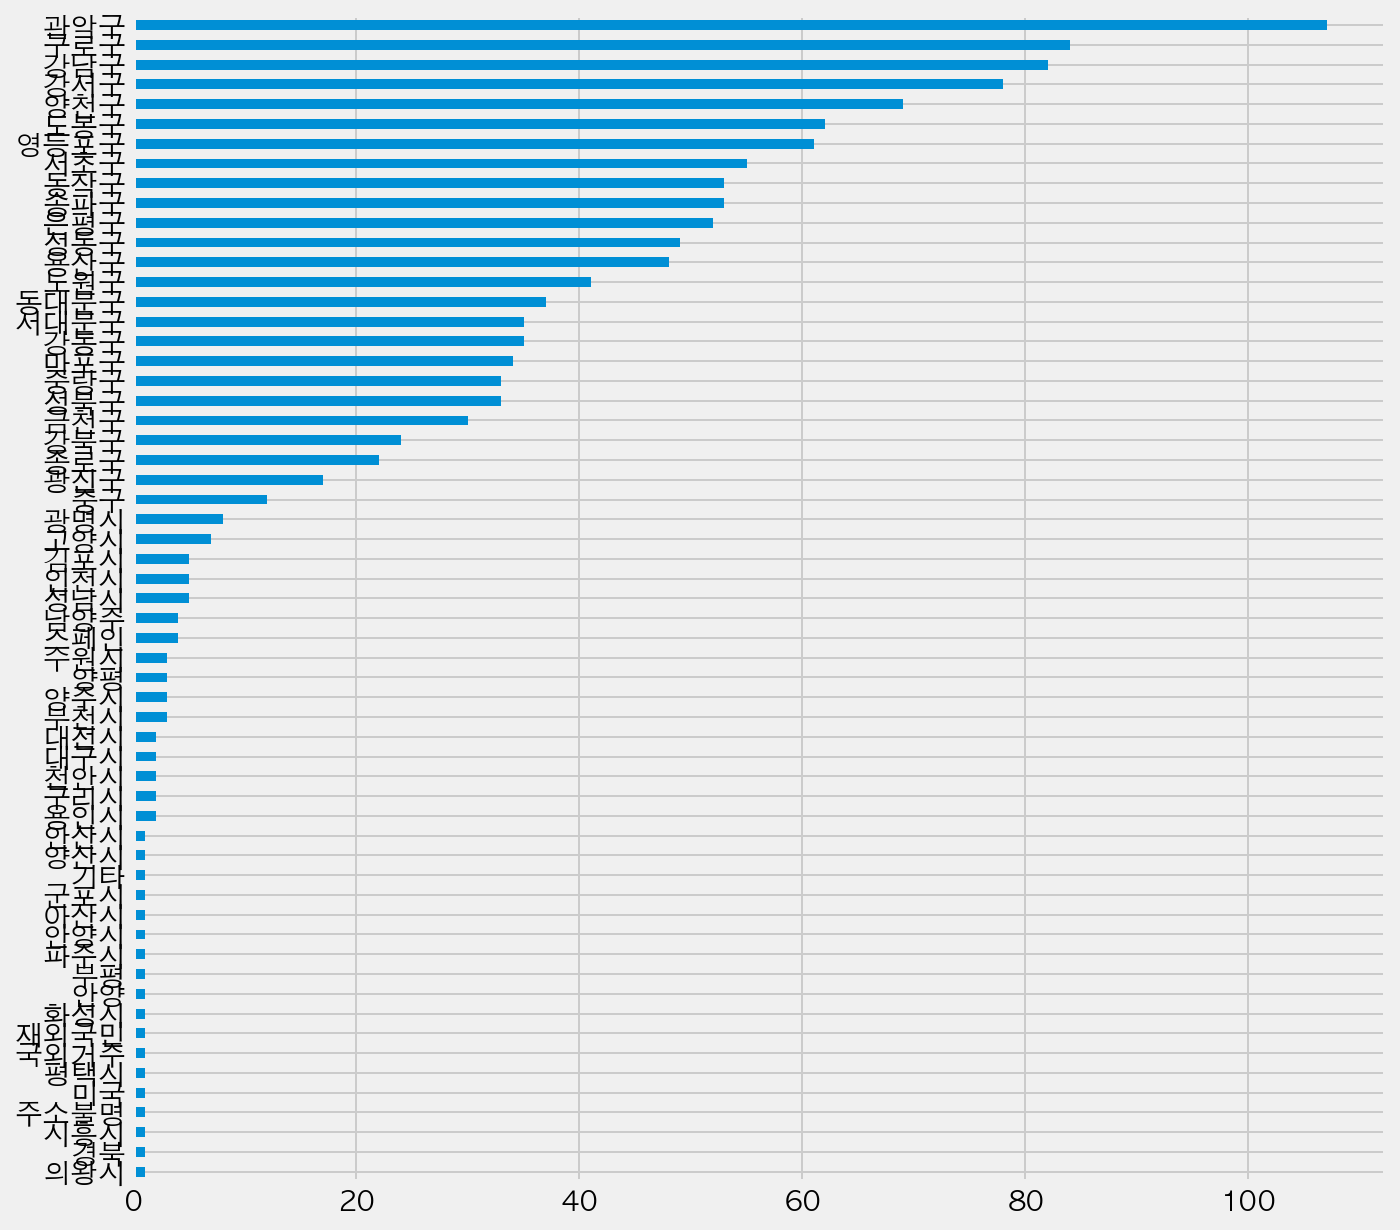

In [10]:
# 구별 확진자의 수를 시각화 합니다.
gu_count.sort_values().plot.barh(figsize=(10, 10), grid=True)

In [11]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
gu[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [12]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.
set(gu_count.index) - set(gu)

{'경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [13]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "환자수"]
df_gu.head()

,구,환자수
0,관악구,107
1,구로구,84
2,강남구,82
3,강서구,78
4,양천구,69


In [14]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1284,12648,6.26.,관악구,-,왕성교회 관련,보라매병원
1,1283,12644,6.26.,관악구,-,왕성교회 관련,보라매병원
2,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-
3,1281,12639,6.26.,구로구,-,구로구 확진자 접촉,보라매병원
4,1280,12643,6.26.,은평구,이라크,해외 접촉 추정,서북병원
...,...,...,...,...,...,...,...
1279,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1280,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1281,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1282,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [15]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
df.loc[~df["거주지"].isin(gu), "지역"] = "타지역"
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,지역
0,1284,12648,6.26.,관악구,-,왕성교회 관련,보라매병원,관악구
1,1283,12644,6.26.,관악구,-,왕성교회 관련,보라매병원,관악구
2,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-,중구
3,1281,12639,6.26.,구로구,-,구로구 확진자 접촉,보라매병원,구로구
4,1280,12643,6.26.,은평구,이라크,해외 접촉 추정,서북병원,은평구


In [16]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"].map(lambda x : x if x in gu else "타지역")
df[["거주지", "지역"]].head()

,거주지,지역
0,관악구,관악구
1,관악구,관악구
2,중구,중구
3,구로구,구로구
4,은평구,은평구


In [17]:
df_gu_etc = df["지역"].value_counts()
df_gu_etc

관악구     107
구로구      84
강남구      82
타지역      78
강서구      78
양천구      69
도봉구      62
영등포구     61
서초구      55
송파구      53
동작구      53
은평구      52
성동구      49
용산구      48
노원구      41
동대문구     37
서대문구     35
강동구      35
마포구      34
성북구      33
중랑구      33
금천구      30
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

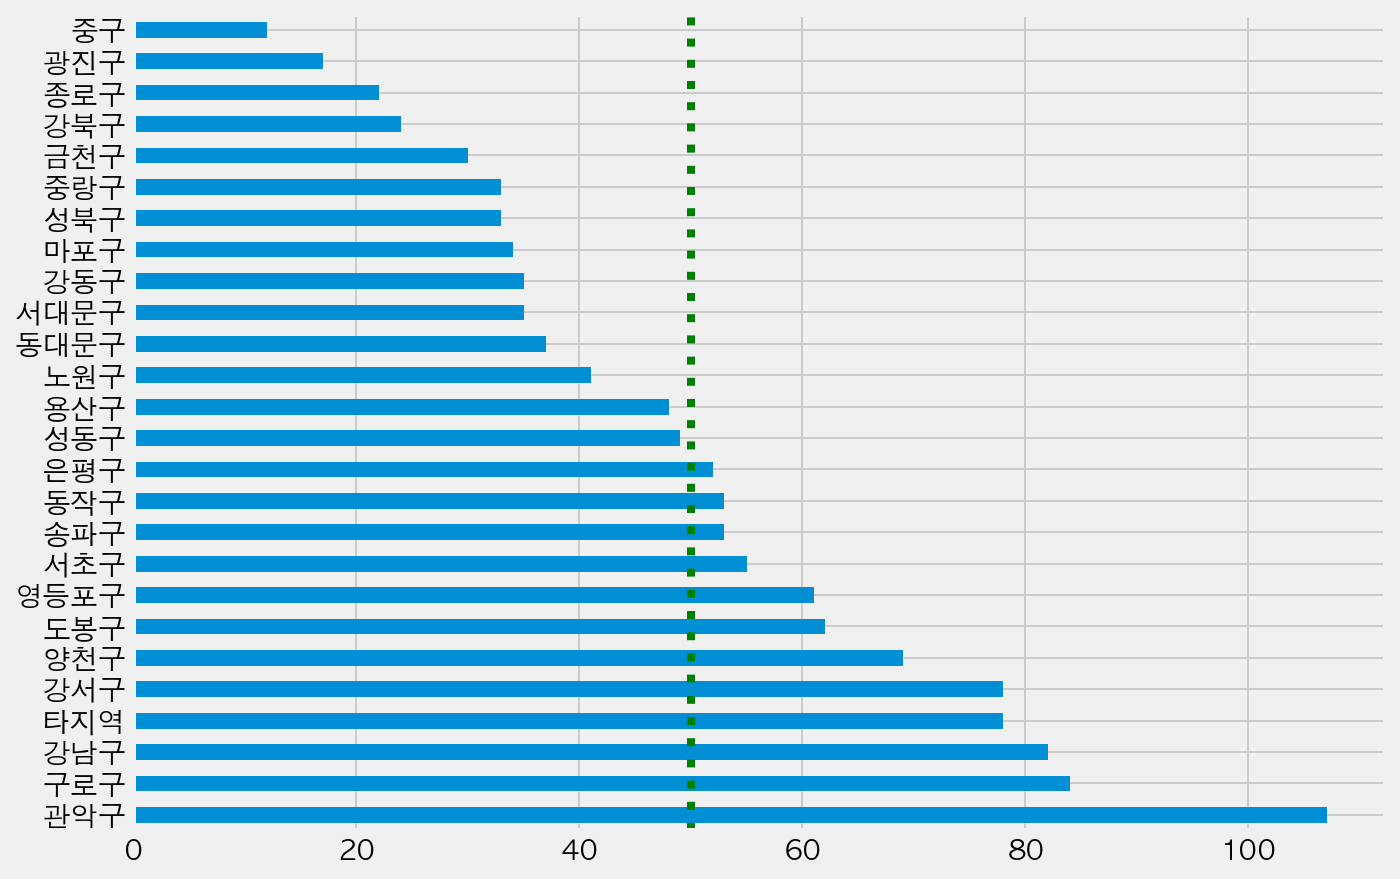

In [18]:
g = df_gu_etc.plot.barh(figsize=(10, 7))
g.axvline(50, linestyle=":", color="green")

## 확진일

In [19]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
2.7.      1
2.6.      1
4.19.     1
3.3.      1
4.18.     1
Name: 확진일, Length: 127, dtype: int64

In [20]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head(1)

0    6.26.
Name: 확진일, dtype: object

In [21]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-06-26
1   2020-06-26
2   2020-06-26
3   2020-06-26
4   2020-06-26
Name: 확진일자, dtype: datetime64[ns]

In [22]:
df["월"] = df["확진일자"].dt.month

In [23]:
df["주"] = df["확진일자"].dt.week
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,지역,확진일자,월,주
0,1284,12648,6.26.,관악구,-,왕성교회 관련,보라매병원,관악구,2020-06-26,6,26


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

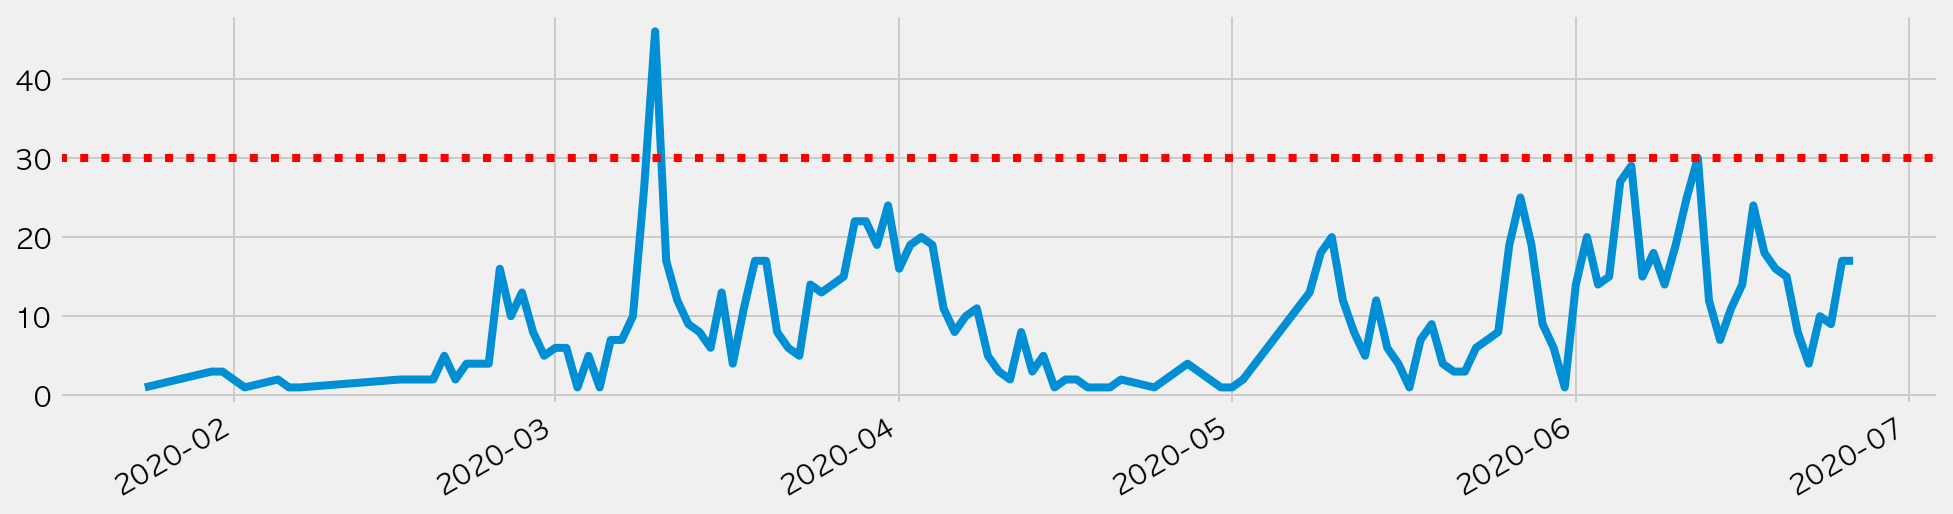

In [24]:
df["확진일자"].value_counts().sort_index().plot(
    figsize=(15, 4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

### 선그래프에 값 표시하기

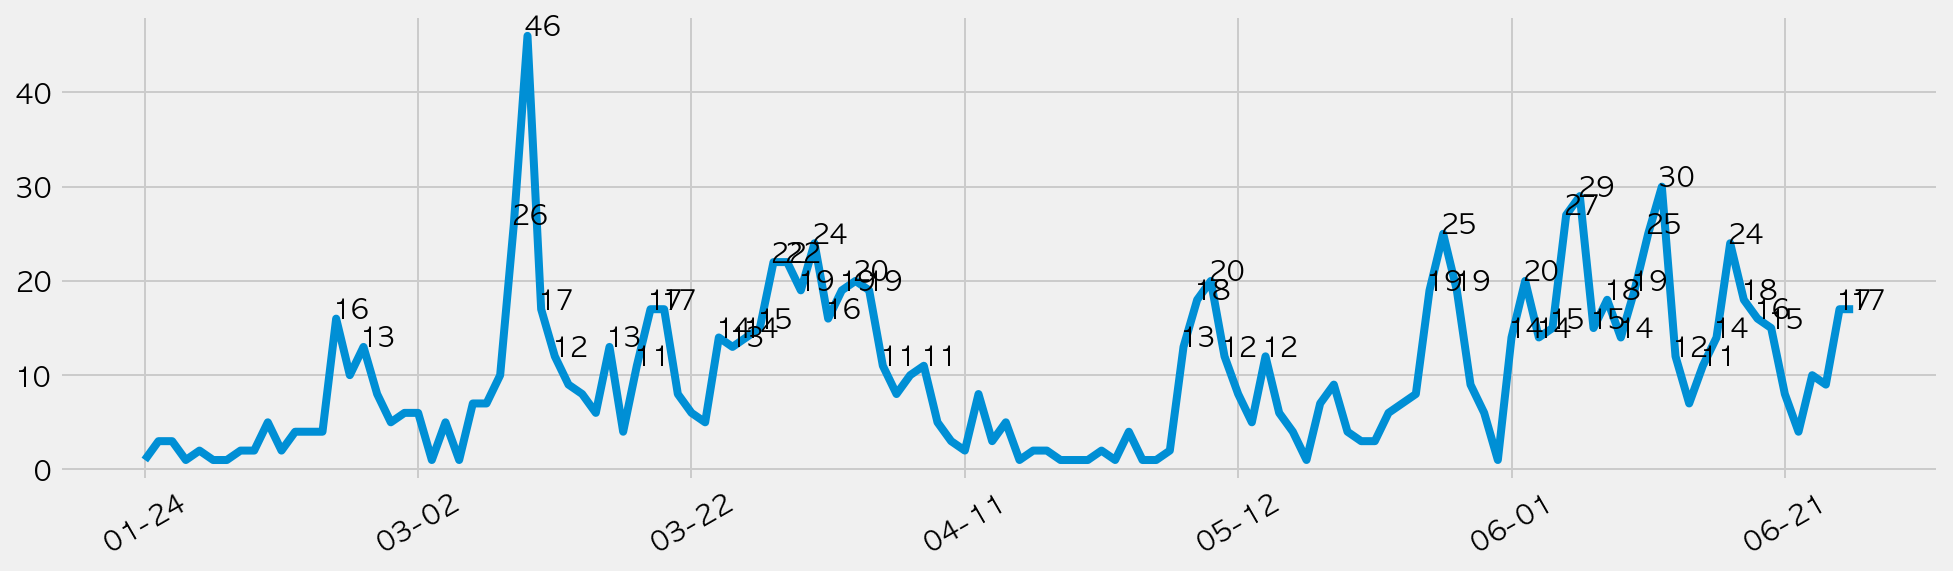

In [25]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
g = day_count.plot(figsize=(15, 4), rot=30)


for i in range(len(day_count)):
    case_count = day_count.iloc[i] 
    if case_count > 10:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

In [26]:
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[0]

1

### 막대그래프 그리기

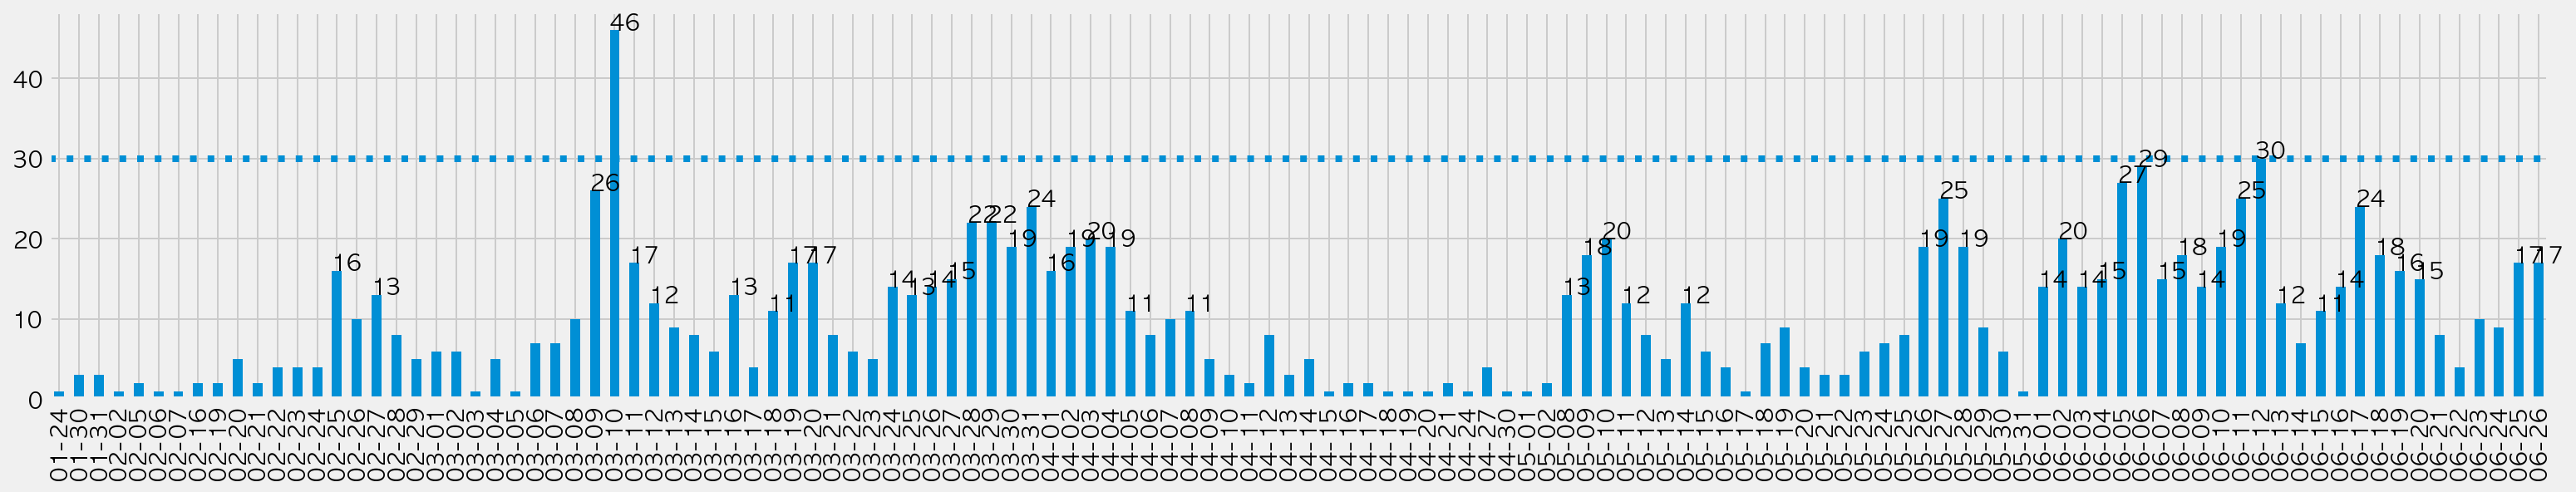

In [27]:
g = day_count.plot.bar(figsize=(24, 4))
g.axhline(30, linestyle=":")

for i in range(len(day_count)):
    case_count = day_count.iloc[i] 
    if case_count > 10:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

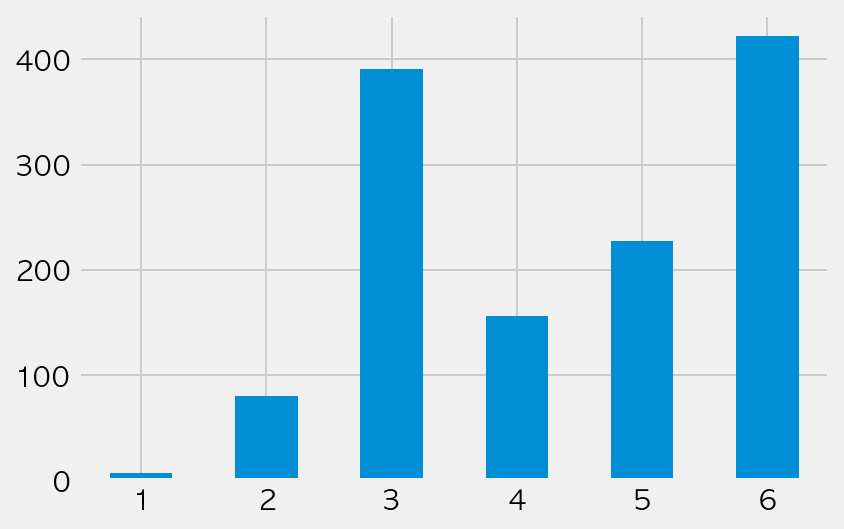

In [28]:
month_case = df["월"].value_counts().sort_index()
month_case.plot.bar(rot=0)

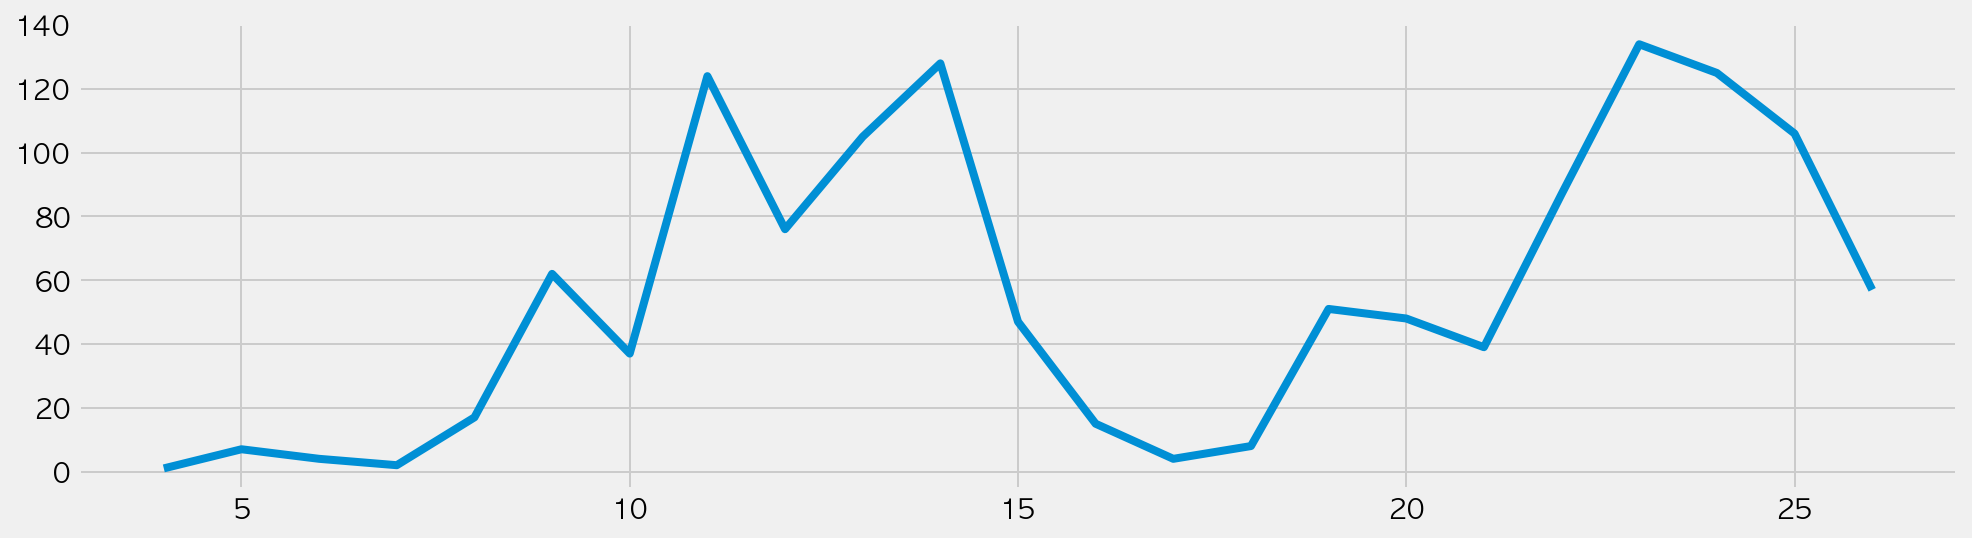

In [29]:
month_case = df["주"].value_counts().sort_index()
month_case.plot(figsize=(15, 4))

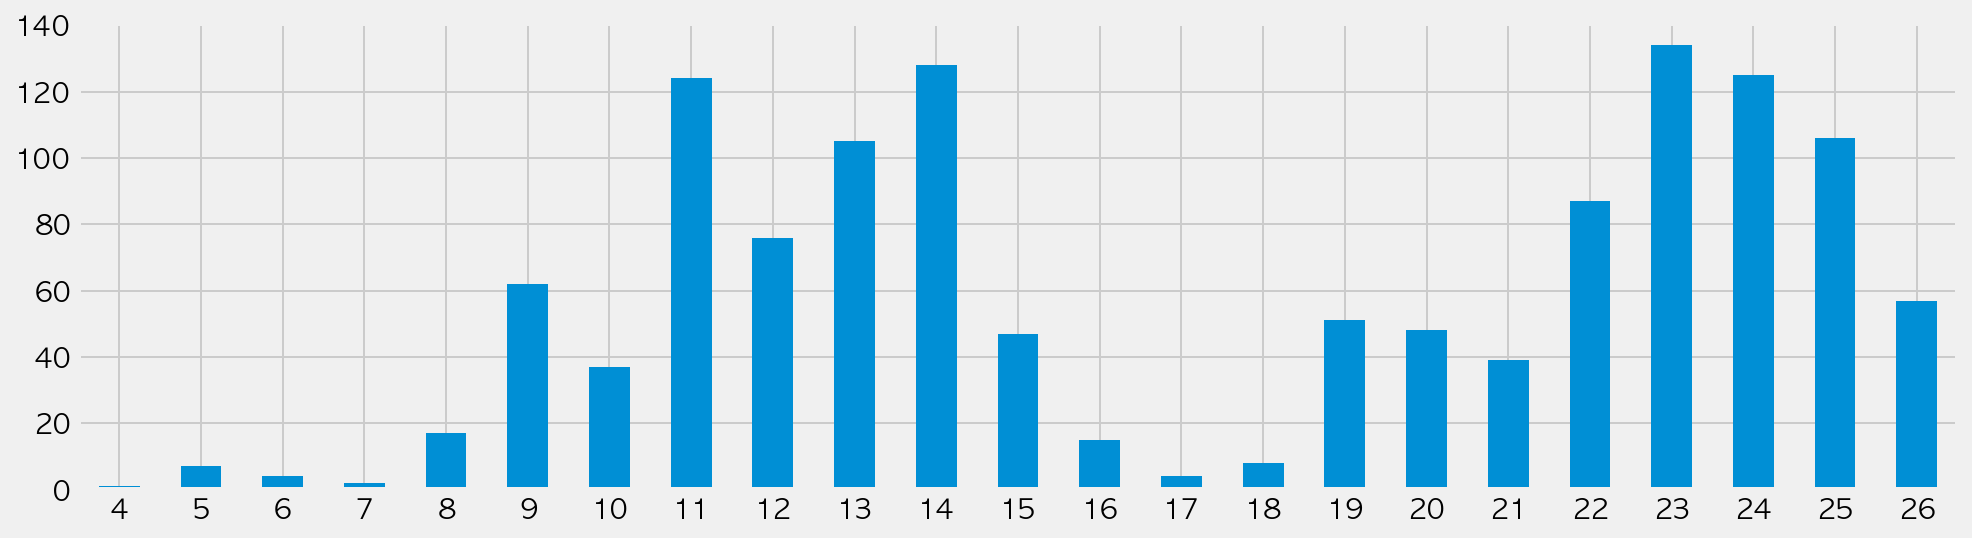

In [30]:
month_case.plot.bar(rot=0, figsize=(15, 4))

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [31]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-06-26 00:00:00'))

In [32]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"확진일자": days})
days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [34]:
df["확진일자"]

0      2020-06-26
1      2020-06-26
2      2020-06-26
3      2020-06-26
4      2020-06-26
          ...    
1279   2020-01-31
1280   2020-01-30
1281   2020-01-30
1282   2020-01-30
1283   2020-01-24
Name: 확진일자, Length: 1284, dtype: datetime64[ns]

In [35]:
cum = df["확진일자"].value_counts()
cum.head()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
Name: 확진일자, dtype: int64

In [36]:
cum = cum.to_frame()
cum.head()

,확진일자
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [37]:
cum.columns = ["확진수"]
cum.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [38]:
all_day = days.merge(cum, left_on="확진일자", right_on=cum.index, how="left")
all_day = all_day.rename(columns={"연번":"확진수"})
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수 구하기

In [39]:
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
150,2020-06-22,4.0,1231.0
151,2020-06-23,10.0,1241.0
152,2020-06-24,9.0,1250.0
153,2020-06-25,17.0,1267.0


In [40]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x: x[-5:])
all_day["일자"].head()

0    01-24
1    01-25
2    01-26
3    01-27
4    01-28
Name: 일자, dtype: object

In [41]:
cum_day = all_day.set_index("일자")
cum_day = cum_day[["확진수", "누적확진"]]
cum_day

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
06-22,4.0,1231.0
06-23,10.0,1241.0
06-24,9.0,1250.0


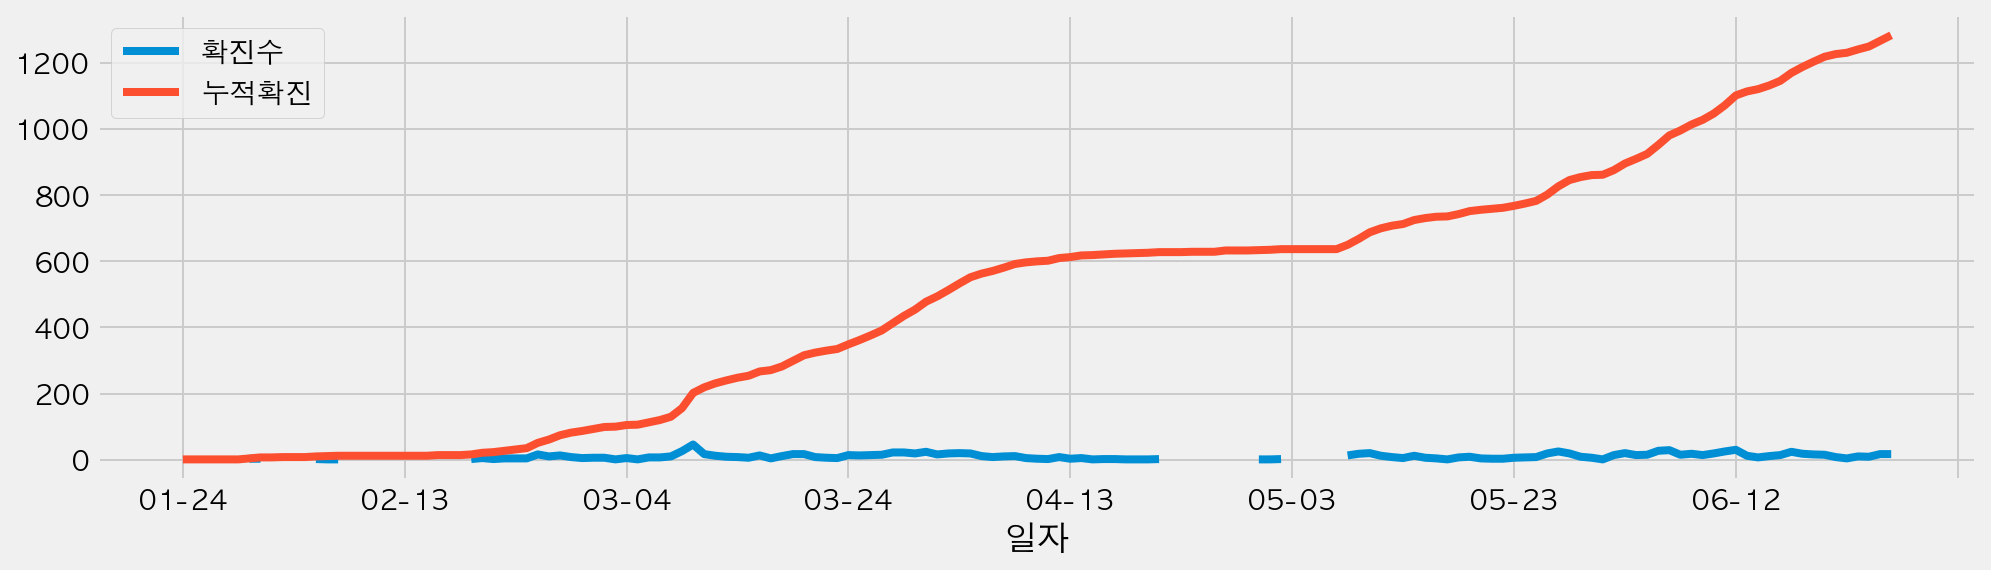

In [42]:
cum_day.plot(figsize=(15, 4))

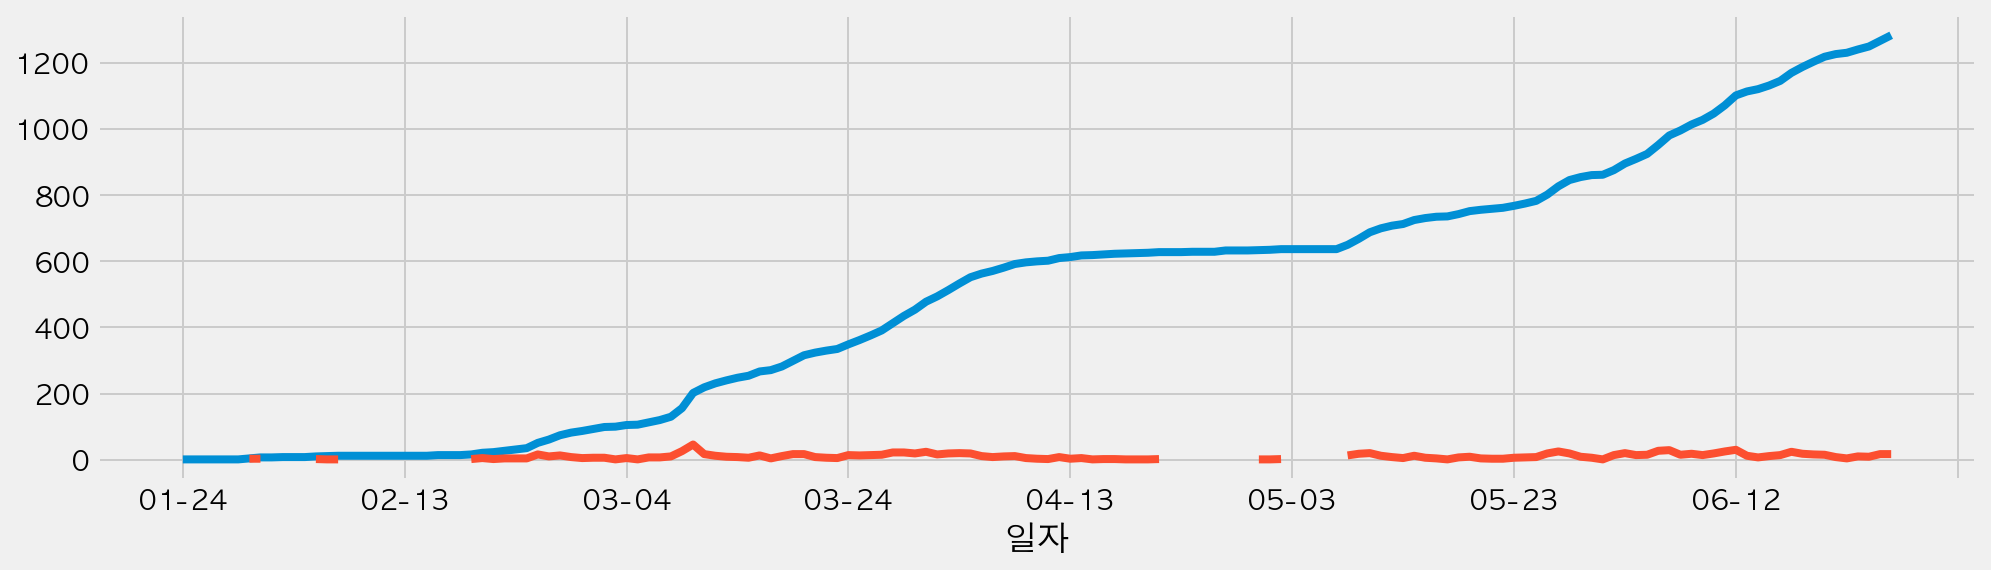

In [43]:
cum_day["누적확진"].plot(label="누적확진", figsize=(15, 4))
cum_day["확진수"].plot(label="확진수", figsize=(15, 4))

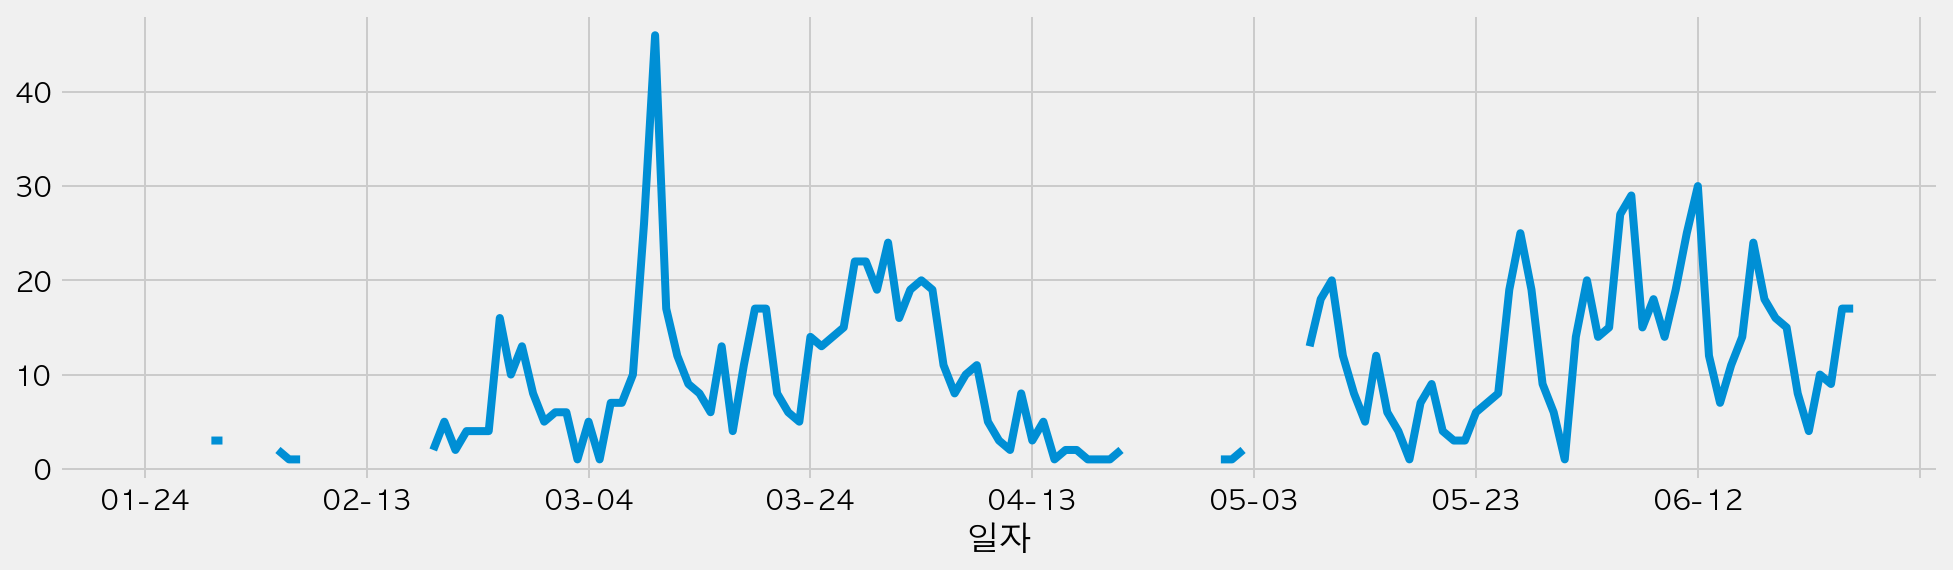

In [44]:
cum_day["확진수"].plot(figsize=(15, 4))

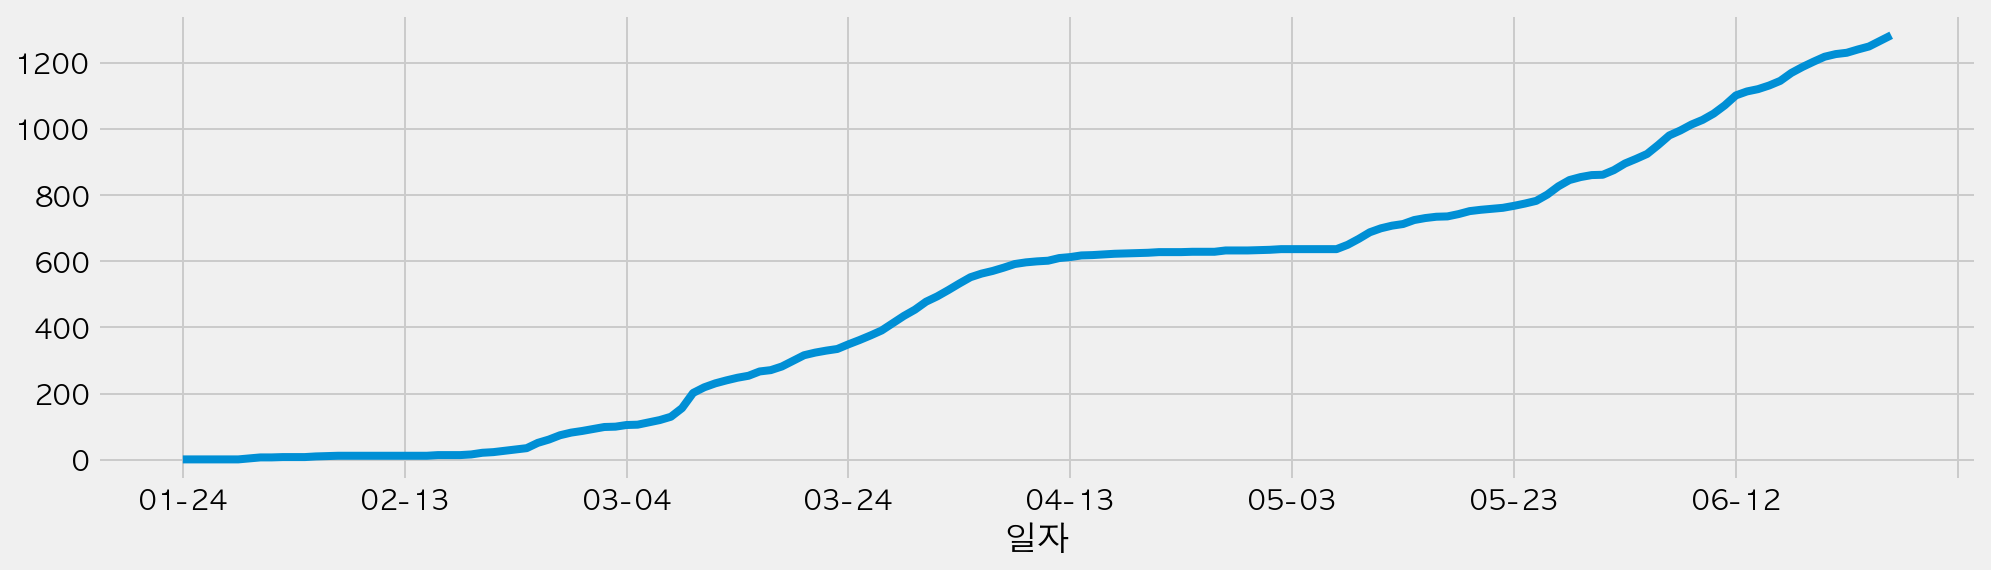

In [45]:
cum_day["누적확진"].plot(figsize=(15, 4))

### 로그스케일

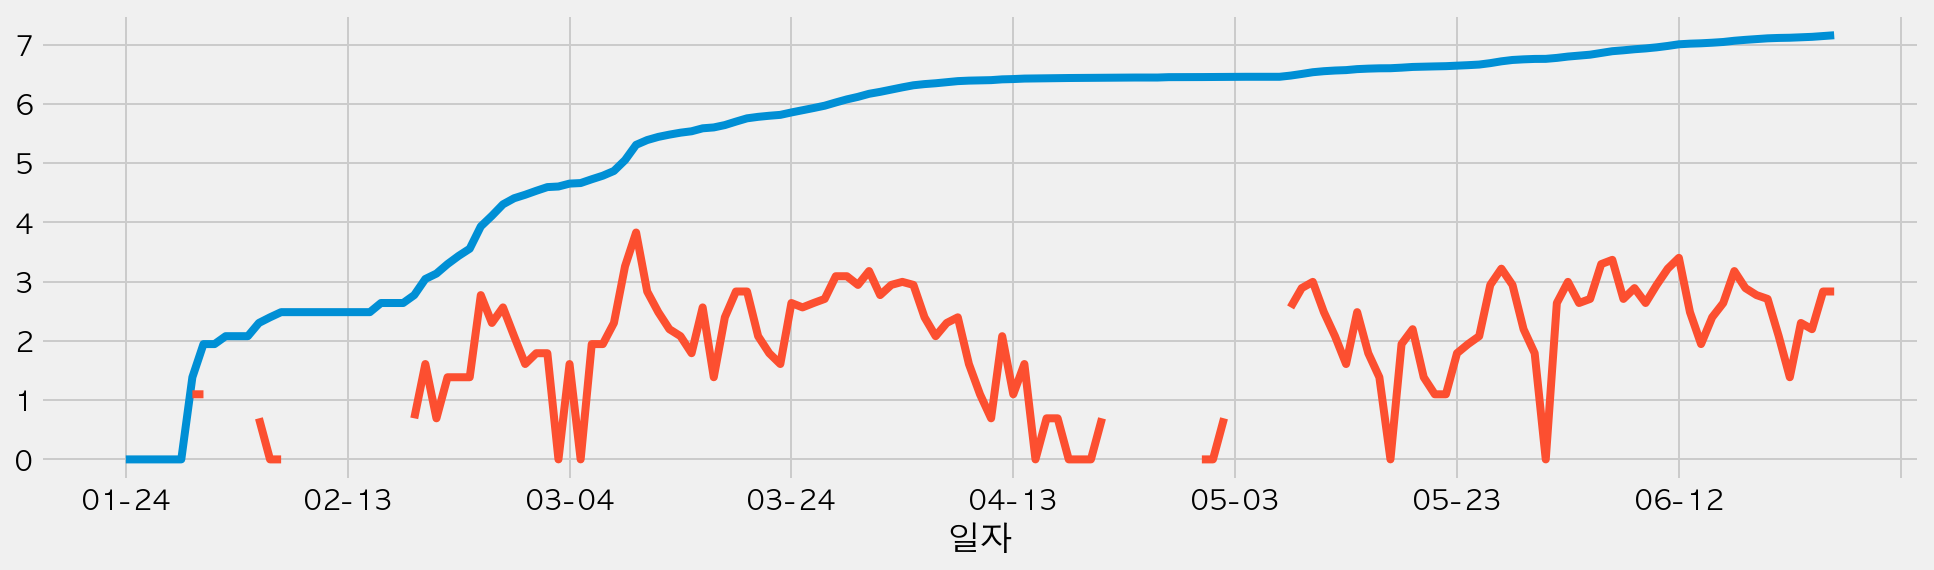

In [46]:
np.log(cum_day["누적확진"]).plot(figsize=(15, 4))
np.log(cum_day["확진수"]).plot(figsize=(15, 4))

In [47]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


## 요일별 확진 수 

In [48]:
all_day_week = all_day.groupby(
    ["확진월", "확진요일"])["확진수"].sum().unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,47,58,66,75,90,56,30


In [49]:
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [50]:
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,47,58,66,75,90,56,30


In [51]:
all_day_week.style.background_gradient(cmap='Blues')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,47,58,66,75,90,56,30


## 접촉력

In [52]:
df["접촉력"].value_counts().head(20)

해외 접촉 추정       277
이태원 클럽 관련      139
리치웨이 관련        115
확인 중            90
구로구 콜센터 관련      60
양천구 운동시설 관련     43
요양시설 관련         43
구로구 교회 관련       41
확인중             39
콜센터직원 접촉        37
타시도 확진자 접촉      37
수도권 개척교회 관련     37
동대문구 관련         28
부천시 쿠팡 관련       24
해외 접촉           22
왕성교회 관련         16
은평구 병원 관련       14
성동구 아파트 관련      13
kb 생명보험 관련      13
삼성서울병원 관련        7
Name: 접촉력, dtype: int64

In [53]:
df["접촉력"].unique()

array(['왕성교회 관련', '해외 접촉 추정', '구로구 확진자 접촉', '관악구 확진자 접촉', '동작구 확진자 접촉',
       '강남구 역삼동 모임', '확인 중', '금천구 확진자 접촉', '리치웨이 관련', '강서구 확진자 접촉',
       '타시도 확진자 접촉', '요양시설 관련', '강동구 확진자 접촉', '시청역 관련', '대자연코리아',
       '의왕 물류센터 관련', '금천구 도정기 회사 관련', '양천구 운동시설 관련', '은평구 확진자 접촉',
       '대전 다단계 관련', '오렌지라이프 관련', '수도권 개척교회 관련', '서초구 확진자 접촉',
       '타시도 확진자 접촉자', '대전 꿈꾸는 교회', '연아나뉴스클래스 관련', '한국대학생선교회 관련',
       '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련', '용인 형제 관련',
       '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련', '영등포 학원 관련',
       '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련', '#10054 접촉',
       '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련', '#10407 접촉',
       '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉', '#10142 접촉',
       '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)', '#8063 접촉',
       '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉', '콜센터직원 접촉',
       '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉', '#9572 접촉', '확인중',
       '#9525 접촉', '#7914 접촉

In [54]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [55]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [56]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

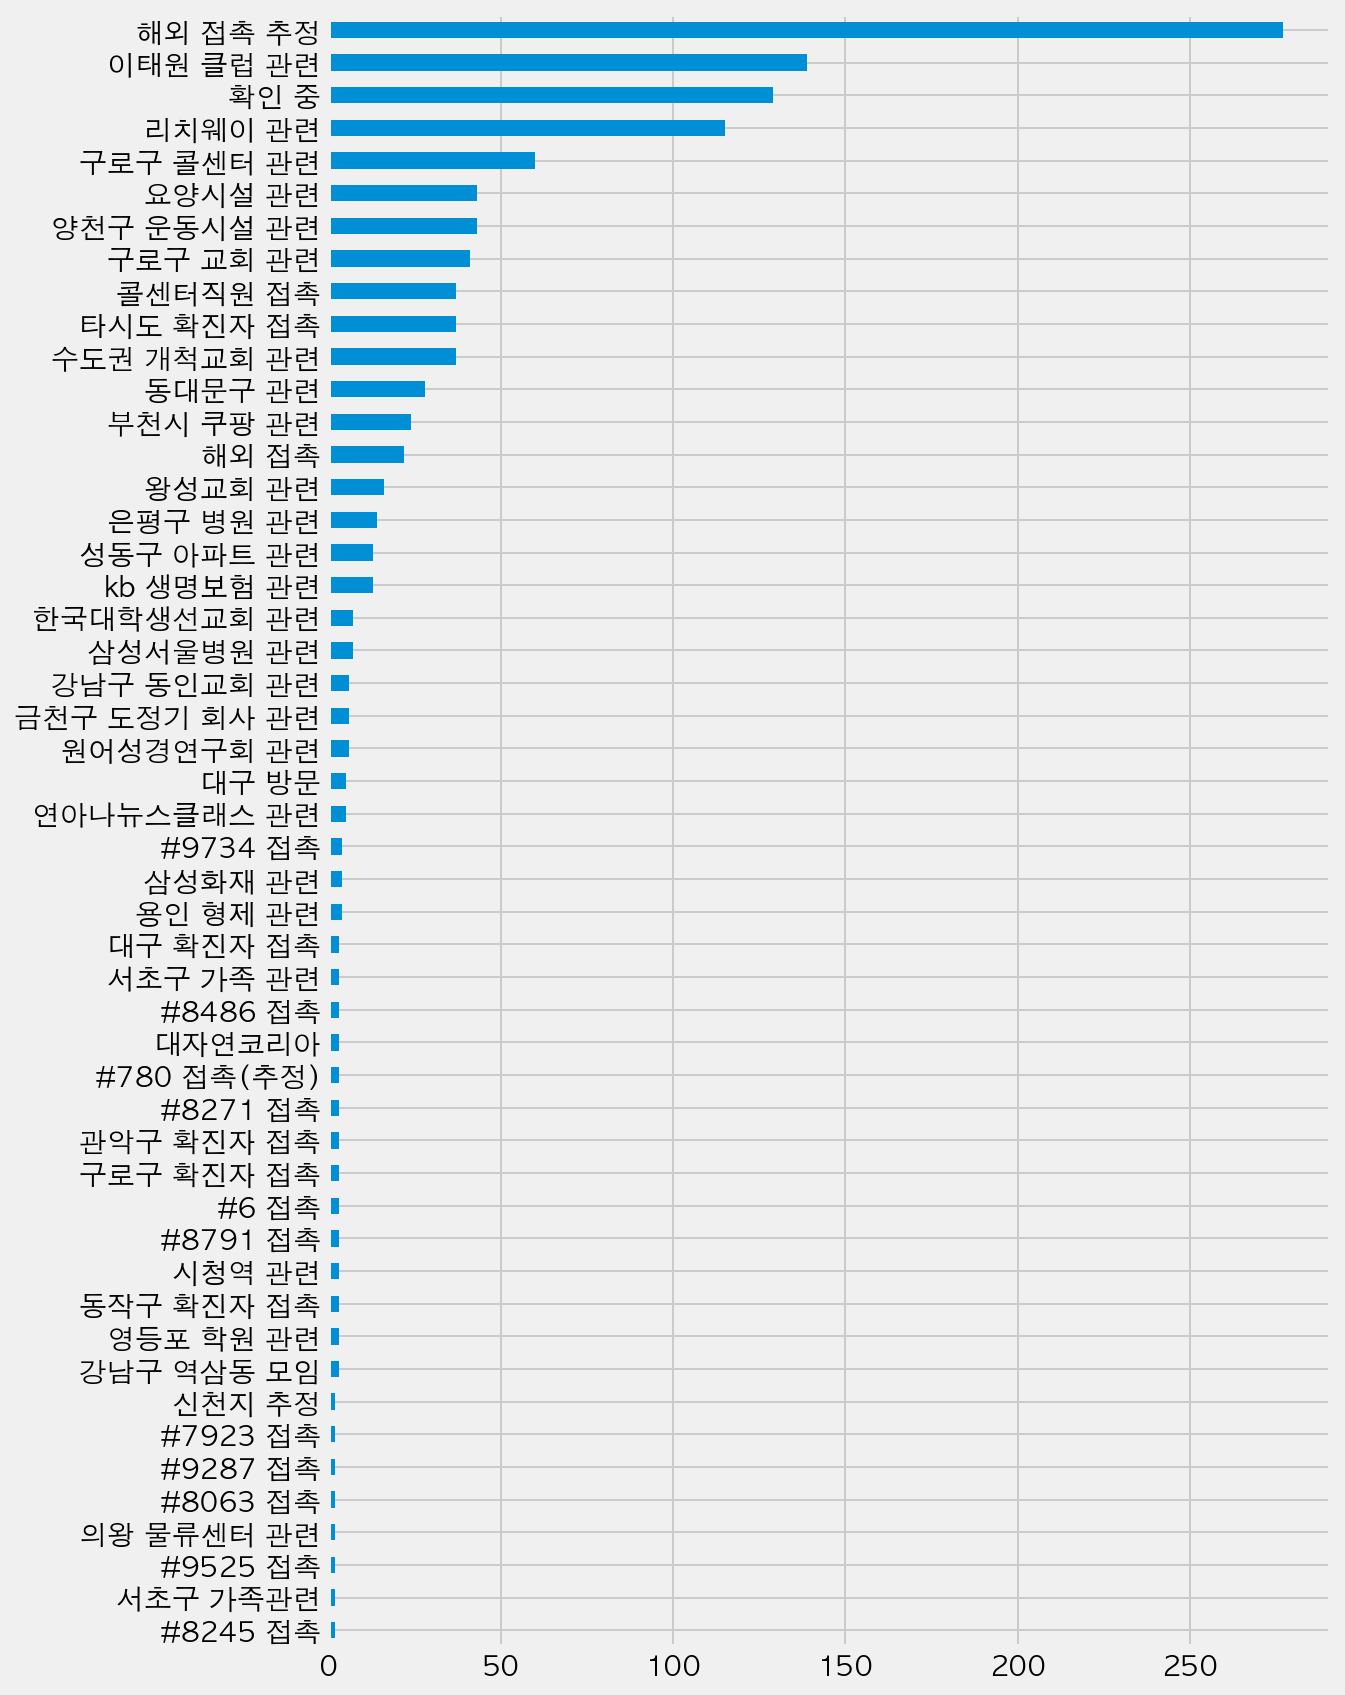

In [57]:
df["접촉력"].value_counts().sort_values().tail(50).plot.barh(figsize=(8, 14))

In [58]:
top_contact = df["접촉력"].value_counts().head(10)
top_contact

해외 접촉 추정       277
이태원 클럽 관련      139
확인 중           129
리치웨이 관련        115
구로구 콜센터 관련      60
양천구 운동시설 관련     43
요양시설 관련         43
구로구 교회 관련       41
콜센터직원 접촉        37
타시도 확진자 접촉      37
Name: 접촉력, dtype: int64

In [59]:
top_contact.index

Index(['해외 접촉 추정', '이태원 클럽 관련', '확인 중', '리치웨이 관련', '구로구 콜센터 관련', '양천구 운동시설 관련',
       '요양시설 관련', '구로구 교회 관련', '콜센터직원 접촉', '타시도 확진자 접촉'],
      dtype='object')

In [60]:
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,지역,확진일자,월,주,월일
2,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-,중구,2020-06-26,6,26,06-26
4,1280,12643,6.26.,은평구,이라크,해외 접촉 추정,서북병원,은평구,2020-06-26,6,26,06-26
21,1263,12592,6.25.,관악구,-,확인 중,생활치료센터,관악구,2020-06-25,6,26,06-25
27,1257,12586,6.25.,관악구,-,리치웨이 관련,보라매병원,관악구,2020-06-25,6,26,06-25
30,1254,12577,6.25.,관악구,-,타시도 확진자 접촉,삼육서울병원,관악구,2020-06-25,6,26,06-25


In [61]:
df.groupby(["접촉력"])

## 가장 많은 전파가 일어난 번호

In [62]:
import re

re.sub("[^0-9]", "", "#7265 접촉(추정)")

'7265'

In [63]:
def get_number(text):
    return re.sub("[^0-9]", "", text)
    
get_number("#7265 접촉(추정)")

'7265'

In [64]:
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact

,index,접촉번호
0,,1199
1,9734,4
2,6,4
3,8791,3
4,780,3
...,...,...
57,10142,1
58,8881,1
59,3,1
60,136,1


In [65]:
contact = contact.drop(0)
contact.columns = ["환자번호", "전파수"]
contact.head(10)

,환자번호,전파수
1,9734,4
2,6,4
3,8791,3
4,780,3
5,8486,3
6,8271,3
7,794,2
8,8063,2
9,10044,2
10,7923,2


In [66]:
top_contact = contact.merge(df, 
                            left_on="환자번호", right_on="접촉번호", 
                            how="left")
top_contact.head(20)

,환자번호,전파수,연번,환자,확진일,거주지,여행력,접촉력,조치사항,지역,확진일자,월,주,월일,접촉번호
0,9734,4,473,9870,3.31.,수원시,-,#9734 접촉,타시도 이관(사망),타지역,2020-03-31,3,14,03-31,9734
1,9734,4,472,9800,3.31.,중구,-,#9734 접촉,보라매병원(퇴원),중구,2020-03-31,3,14,03-31,9734
2,9734,4,447,9725,3.30.,중구,-,#9734 접촉,보라매병원(퇴원),중구,2020-03-30,3,14,03-30,9734
3,9734,4,442,9706,3.30.,서초구,-,#9734 접촉,서울의료원(퇴원),서초구,2020-03-30,3,14,03-30,9734
4,6,4,17,83,2.20.,종로구,-,#6 접촉(추정),국립중앙의료원(퇴원),종로구,2020-02-20,2,8,02-20,6
5,6,4,10,21,2.5.,성북구,-,#6 접촉,서울대학교병원(퇴원),성북구,2020-02-05,2,6,02-05,6
6,6,4,7,11,1.31.,종로구,-,#6 접촉,서울대학교병원(퇴원),종로구,2020-01-31,1,5,01-31,6
7,6,4,6,10,1.31.,종로구,-,#6 접촉,서울대학교병원(퇴원),종로구,2020-01-31,1,5,01-31,6
8,8791,3,381,9427,3.27.,중랑구,-,#8791 접촉,서울의료원(퇴원),중랑구,2020-03-27,3,13,03-27,8791
9,8791,3,319,8833,3.21.,중랑구,-,#8791 접촉,생활치료센터(퇴원),중랑구,2020-03-21,3,12,03-21,8791


In [67]:
df_call = df[df["접촉력"].str.contains("콜센터")]
print(df_call.shape)
df_call["접촉력"].value_counts()

(98, 13)


구로구 콜센터 관련    60
콜센터직원 접촉      37
구로구 콜센터 접촉     1
Name: 접촉력, dtype: int64

## 조치사항

In [68]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.
df["조치사항"].value_counts()

서울의료원(퇴원)            315
보라매병원(퇴원)            169
서남병원(퇴원)             140
서남병원                  92
생활치료센터(퇴원)            74
                    ... 
한양대병원/국립중앙의료원(퇴원)      1
서울의료원(사망)              1
국군수도병원(퇴원)             1
타시도 이관(사망)             1
서울대학교병원(사망)            1
Name: 조치사항, Length: 73, dtype: int64

## 퇴원, 사망여부

In [69]:
df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["사망"] = df["조치사항"].str.contains("사망")
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")
df["병원"] = df["병원"].str.replace("\(사망\)", "")

In [70]:
df["퇴원"].value_counts()

True     908
False    376
Name: 퇴원, dtype: int64

In [71]:
df["퇴원"].value_counts(normalize=True) * 100

True     70.716511
False    29.283489
Name: 퇴원, dtype: float64

In [72]:
df["사망"].value_counts()

False    1277
True        7
Name: 사망, dtype: int64

In [73]:
df["사망"].value_counts(normalize=True) * 100

False    99.454829
True      0.545171
Name: 사망, dtype: float64

## 병원

In [74]:
df["병원"].value_counts()

서울의료원            388
보라매병원            236
서남병원             233
생활치료센터            86
서북병원              62
국립중앙의료원           61
타시도 이관            46
은평성모병원            15
서울대학교병원           14
상계백병원             12
적십자병원             11
중앙대학교병원           11
서울대병원             10
삼육서울병원             7
고대구로병원             7
강북삼성병원             6
순천향병원              6
순천향서울병원            6
한일병원               6
중앙대병원              6
서울아산병원             6
원자력병원              5
서울성모병원             5
세브란스병원             4
한양대병원              3
서울삼성병원             3
서울백병원              3
건국대병원              3
강남성심병원             3
국군수도통합병원           2
강남세브란스병원           2
한양대학교병원            2
순천향대학병원            2
삼성서울병원             2
생활치료시설             2
-                  1
신촌세브란스병원           1
중앙대학병원             1
고대안암병원             1
건대병원               1
한양대병원/국립중앙의료원      1
경희대학교병원            1
국군수도병원             1
Name: 병원, dtype: int64

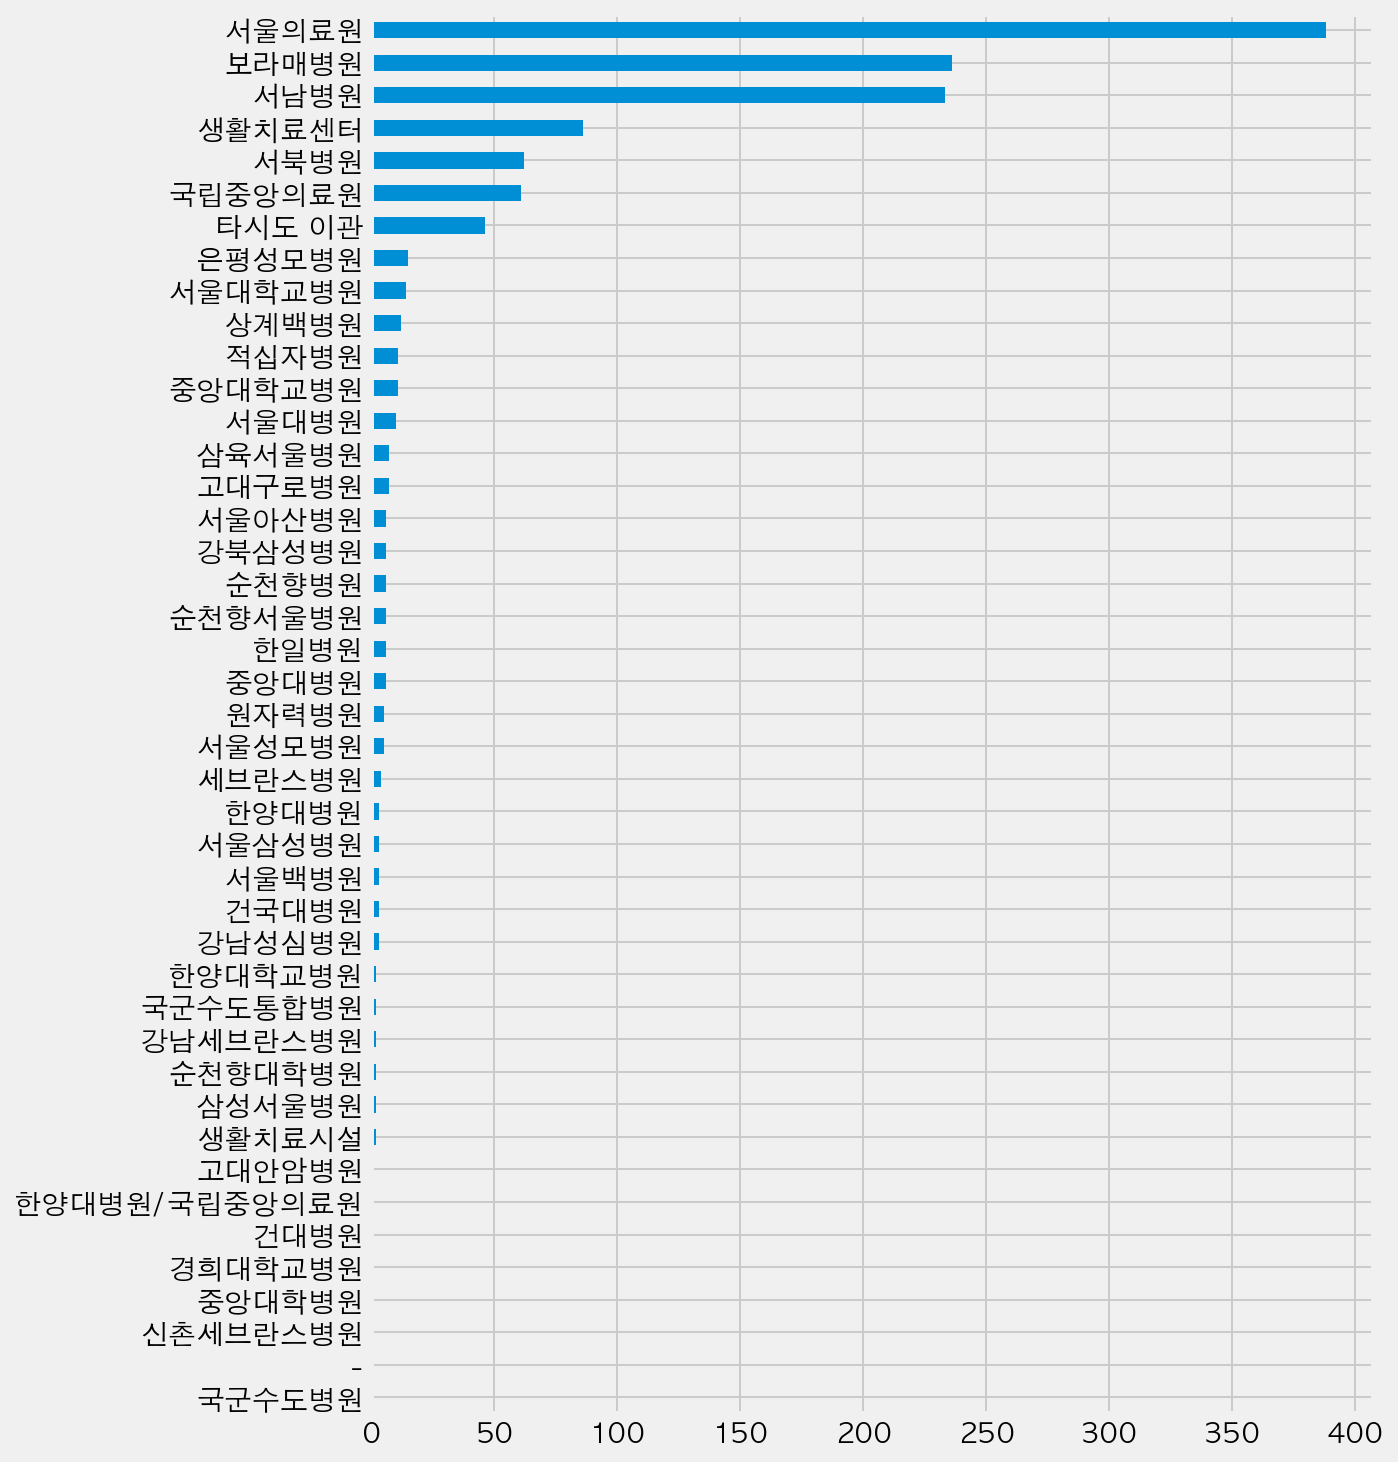

In [75]:
df["병원"].value_counts().sort_values().plot.barh(figsize=(8, 12))

## 여행력

In [76]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"] = df["해외"].replace("", np.nan)
df["해외"].value_counts()

미국                           123
영국                            45
필리핀                           18
스페인                           11
프랑스                           10
태국                             6
멕시코                            5
캐나다                            5
일본                             4
중국 우한시                         4
브라질                            4
파키스탄                           4
이탈리아                           3
인도                             3
UAE                            3
이라크                            2
카자흐스탄                          2
필리핀, 마닐라                       2
아일랜드                           2
아랍에미리트                         2
폴란드                            2
팔라우                            2
터키                             2
프랑스, 독일                        2
독일                             2
인도네시아                          2
이탈리아, 프랑스                      2
중국 청도                          1
미국 뉴욕                          1
아르헨티나, 볼리비아, 브라질               1
베트남       

In [77]:
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(303, 17)

In [78]:
df_oversea["해외"] = df_oversea["해외"].replace("우한교민", "우한 교민")
df_oversea["해외"].value_counts()

미국                           123
영국                            45
필리핀                           18
스페인                           11
프랑스                           10
태국                             6
캐나다                            5
멕시코                            5
브라질                            4
일본                             4
파키스탄                           4
중국 우한시                         4
이탈리아                           3
인도                             3
UAE                            3
필리핀, 마닐라                       2
폴란드                            2
터키                             2
이탈리아, 프랑스                      2
인도네시아                          2
아랍에미리트                         2
우한 교민                          2
팔라우                            2
카자흐스탄                          2
독일                             2
아일랜드                           2
이라크                            2
프랑스, 독일                        2
멕시코, 미국                        1
베트남                            1
미국, 캐나다, 멕

[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [79]:
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드|터키|아일랜드'

In [80]:
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [81]:
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea["해외"].value_counts()

미국           125
유럽            93
필리핀           20
남미            15
중국             7
태국             6
UAE            5
캐나다            5
일본             4
파키스탄           4
인도             3
이라크            2
카자흐스탄          2
인도네시아          2
팔라우            2
말레이시아          1
키르기스스탄         1
포르투칼           1
방글라데시          1
싱가포르           1
호주, 인도네시아      1
베트남            1
러시아            1
Name: 해외, dtype: int64

In [82]:
day_oversea = df_oversea.groupby(
    ["확진일자", "해외"])["연번"].count().groupby(level=[1]).cumsum()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      3
2020-02-02  중국      4
2020-02-05  싱가포르    1
2020-02-06  중국      5
Name: 연번, dtype: int64

In [83]:
day_oversea = day_oversea.reset_index()
day_oversea = day_oversea.rename(columns={'연번':'확진자수'})
print(day_oversea.shape)
day_oversea.head(10)

(160, 3)


,확진일자,해외,확진자수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5
5,2020-02-07,중국,6
6,2020-02-23,베트남,1
7,2020-02-25,중국,7
8,2020-02-25,태국,1
9,2020-02-27,유럽,1


In [84]:
oversea_count = df_oversea["해외"].value_counts(ascending=True)
oversea_count

러시아            1
베트남            1
호주, 인도네시아      1
싱가포르           1
방글라데시          1
포르투칼           1
키르기스스탄         1
말레이시아          1
팔라우            2
인도네시아          2
카자흐스탄          2
이라크            2
인도             3
파키스탄           4
일본             4
캐나다            5
UAE            5
태국             6
중국             7
남미            15
필리핀           20
유럽            93
미국           125
Name: 해외, dtype: int64

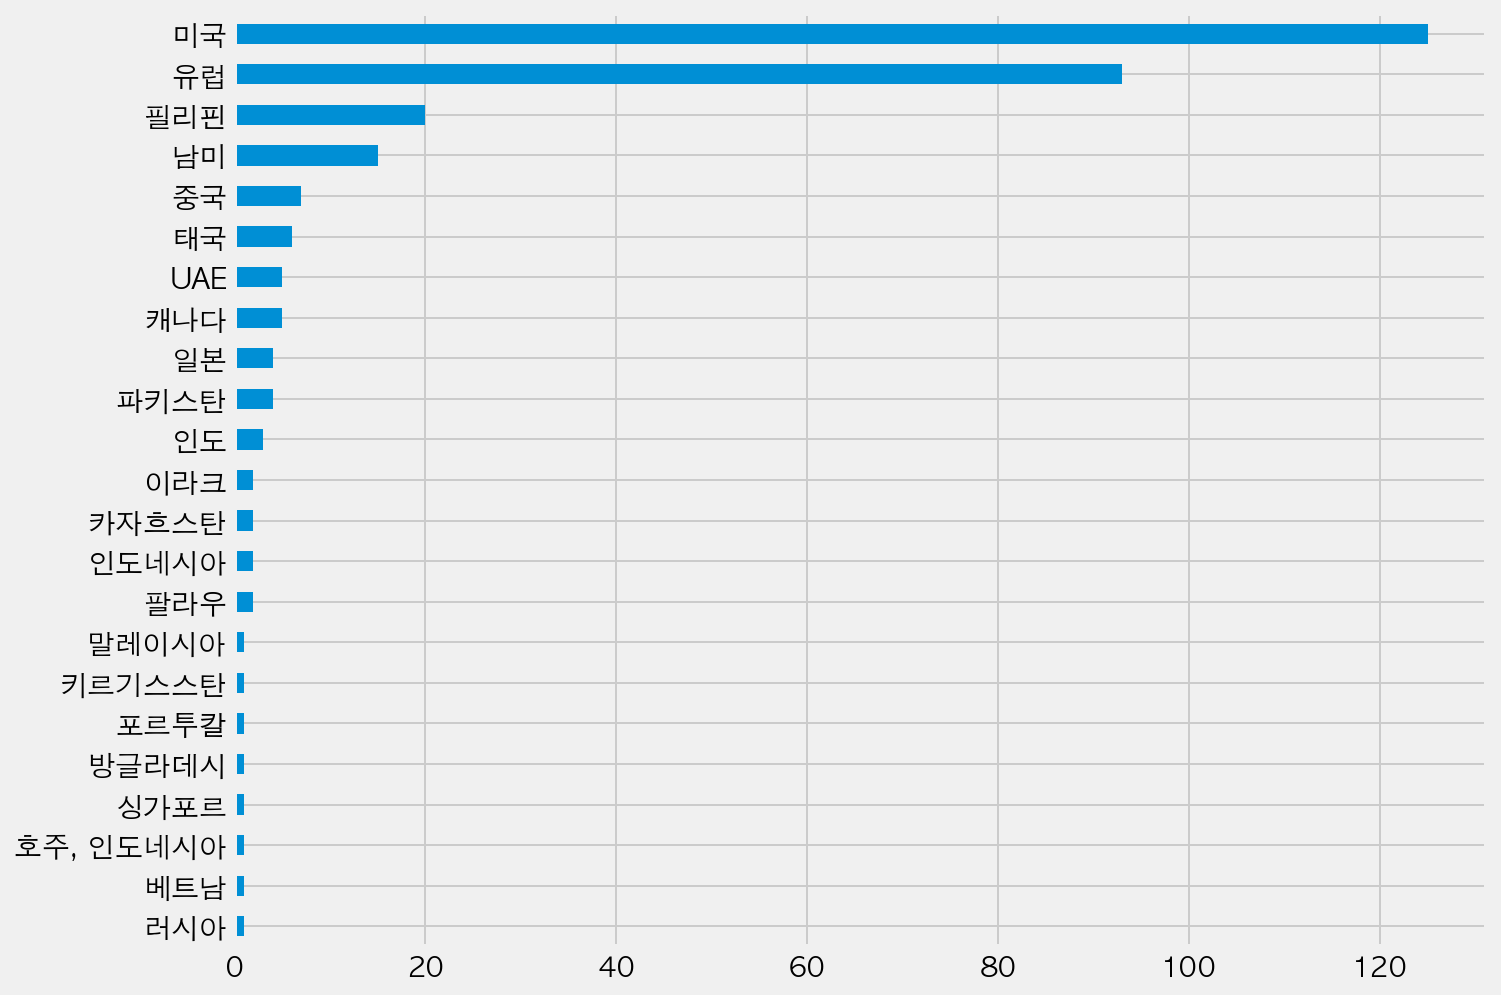

In [85]:
oversea_count.plot.barh(figsize=(10, 8))

In [86]:
day_oversea.iloc[-1, 0]

Timestamp('2020-06-26 00:00:00')

In [87]:
# for i, val in enumerate(oversea_count[-5:]):
#     num = -5 + i
#     print(day_oversea["확진일자"].nunique(), i, num, val)

In [88]:
oversea_count.index[-1]

'미국'

In [89]:
day_oversea.head()

,확진일자,해외,확진자수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [90]:
day_oversea_count = day_oversea.set_index("확진일자")
day_oversea_count.head()

,해외,확진자수
확진일자,,
2020-01-24,중국,1
2020-01-30,중국,3
2020-02-02,중국,4
2020-02-05,싱가포르,1
2020-02-06,중국,5


In [91]:
df_oversea["구"] = df_oversea["거주지"]
df_oversea.loc[~df_oversea["거주지"].str.endswith("구"), "구"] = "타지역"

In [92]:
oversea_count_gu = df_oversea["구"].value_counts()
oversea_count_gu

강남구     41
서초구     27
송파구     24
타지역     22
용산구     17
마포구     15
성동구     14
서대문구    13
관악구     12
강동구     12
동작구     12
성북구     10
강서구      9
영등포구     9
노원구      9
중랑구      8
은평구      8
도봉구      8
동대문구     7
광진구      7
종로구      6
양천구      4
중구       3
구로구      3
강북구      2
금천구      1
Name: 구, dtype: int64

In [93]:
# 전체 구별 확진자
all_count_gu = df["지역"].value_counts()

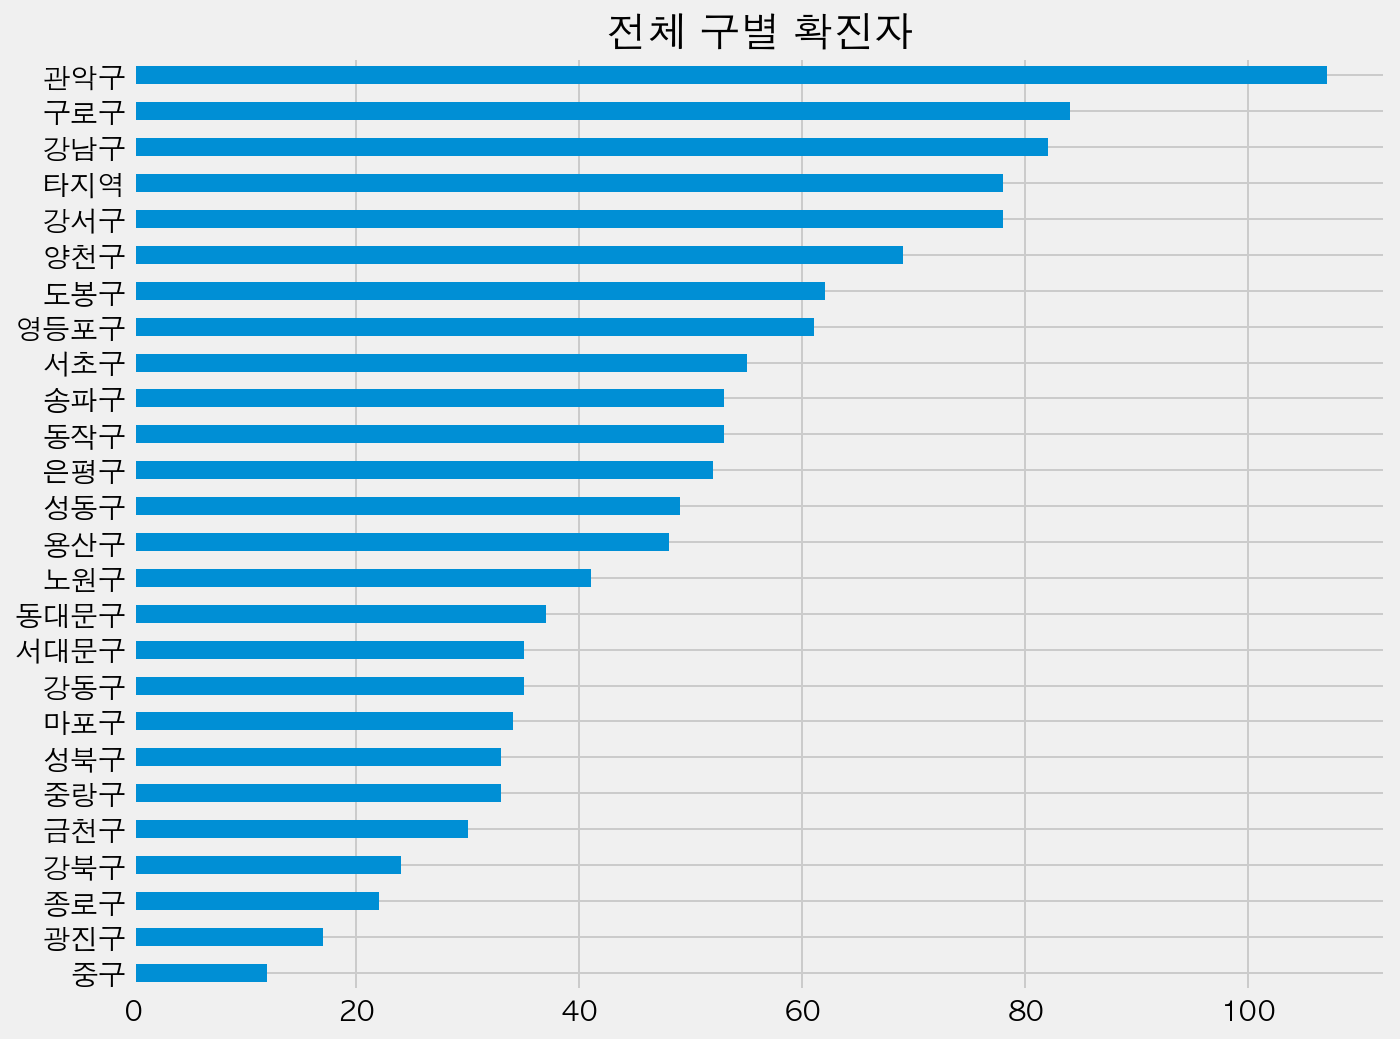

In [94]:
plt.figure(figsize=(10, 8))
plt.title("전체 구별 확진자")
all_count_gu.sort_values().plot.barh()

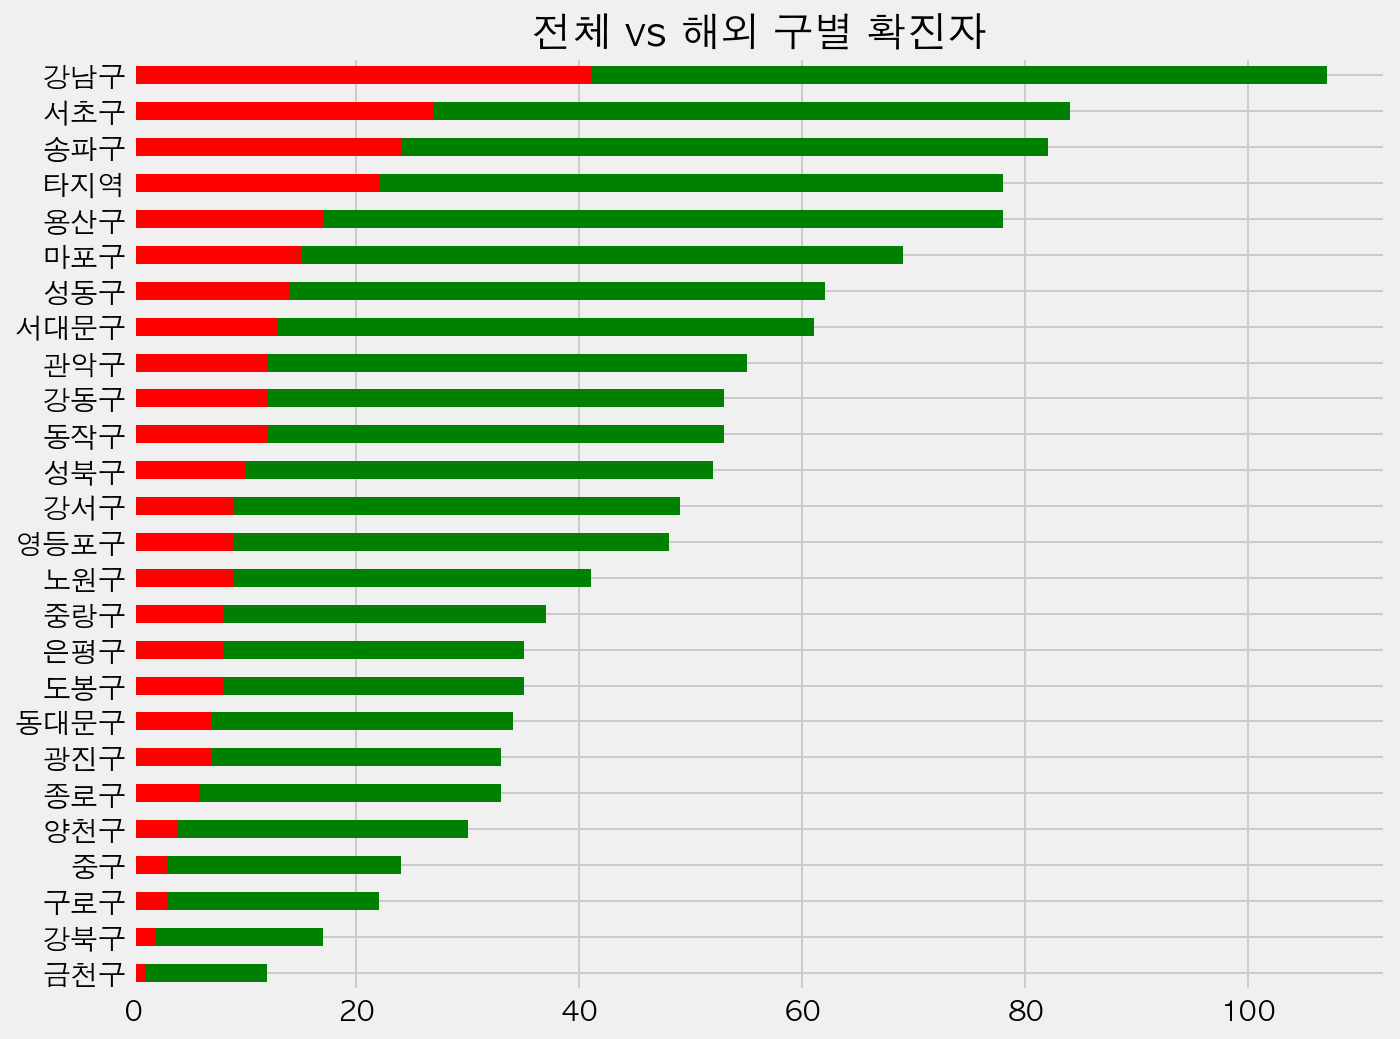

In [95]:
plt.figure(figsize=(10, 8))
plt.title("전체 vs 해외 구별 확진자")
all_count_gu.sort_values().plot.barh(color="g")
oversea_count_gu.sort_values().plot.barh(color="r")

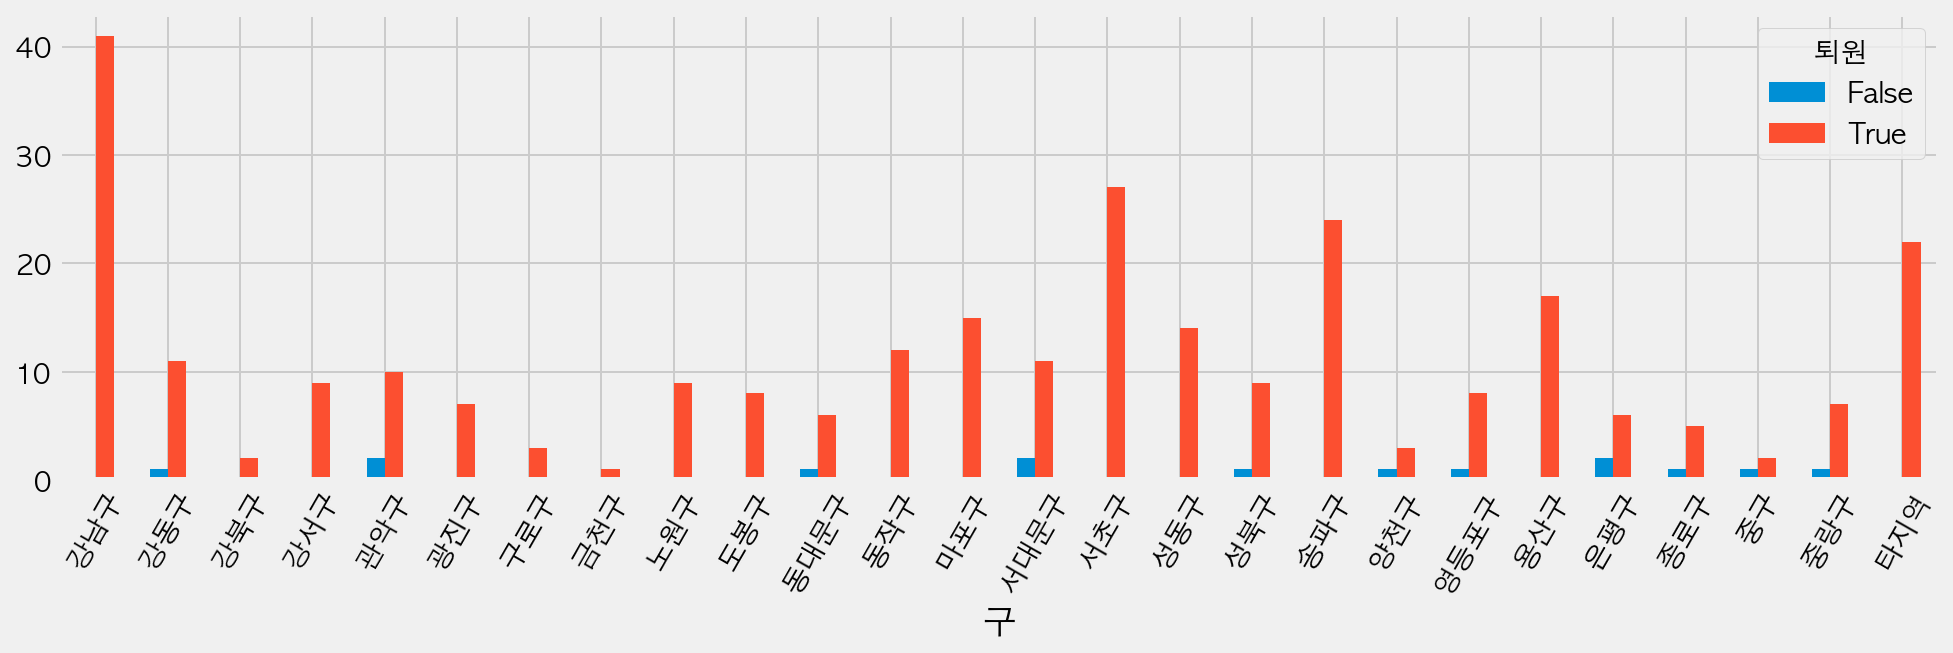

In [96]:
oversea_finish_count = df_oversea.groupby(
    ["구", "퇴원"])["환자"].count().unstack().fillna(0)
oversea_finish_count.plot.bar(figsize=(15, 4), rot=60)

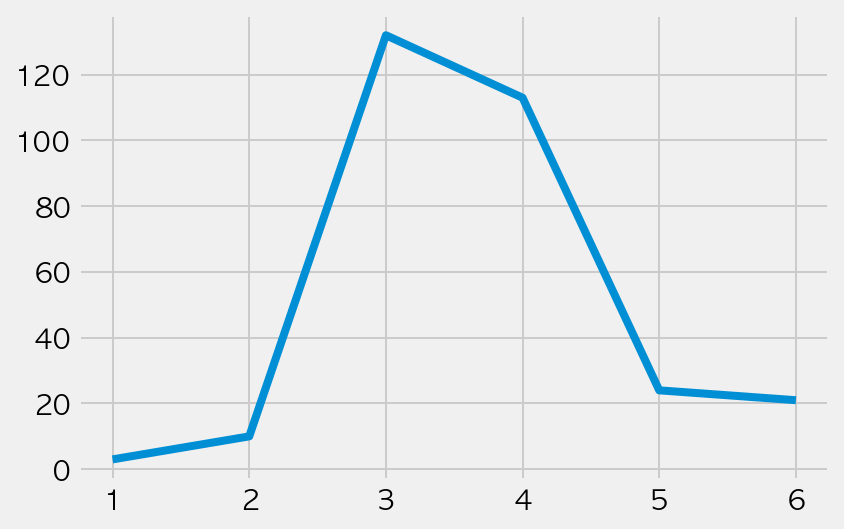

In [97]:
df_oversea["월"].value_counts().sort_index().plot()

In [98]:
month_gu = df_oversea.groupby(["구", "월"])["환자"].count().unstack()
month_gu.fillna(0).astype(int).style.background_gradient()

월,1,2,3,4,5,6
구,,,,,,
강남구,0,1,22,16,2,0
강동구,0,0,5,3,2,2
강북구,0,0,1,0,1,0
강서구,1,1,3,3,1,0
관악구,0,0,5,5,0,2
광진구,0,1,4,2,0,0
구로구,0,0,3,0,0,0
금천구,0,1,0,0,0,0
노원구,0,0,3,2,3,1


In [99]:
top_gu = oversea_count_gu.head(10).index
top_gu

Index(['강남구', '서초구', '송파구', '타지역', '용산구', '마포구', '성동구', '서대문구', '관악구', '강동구'], dtype='object')

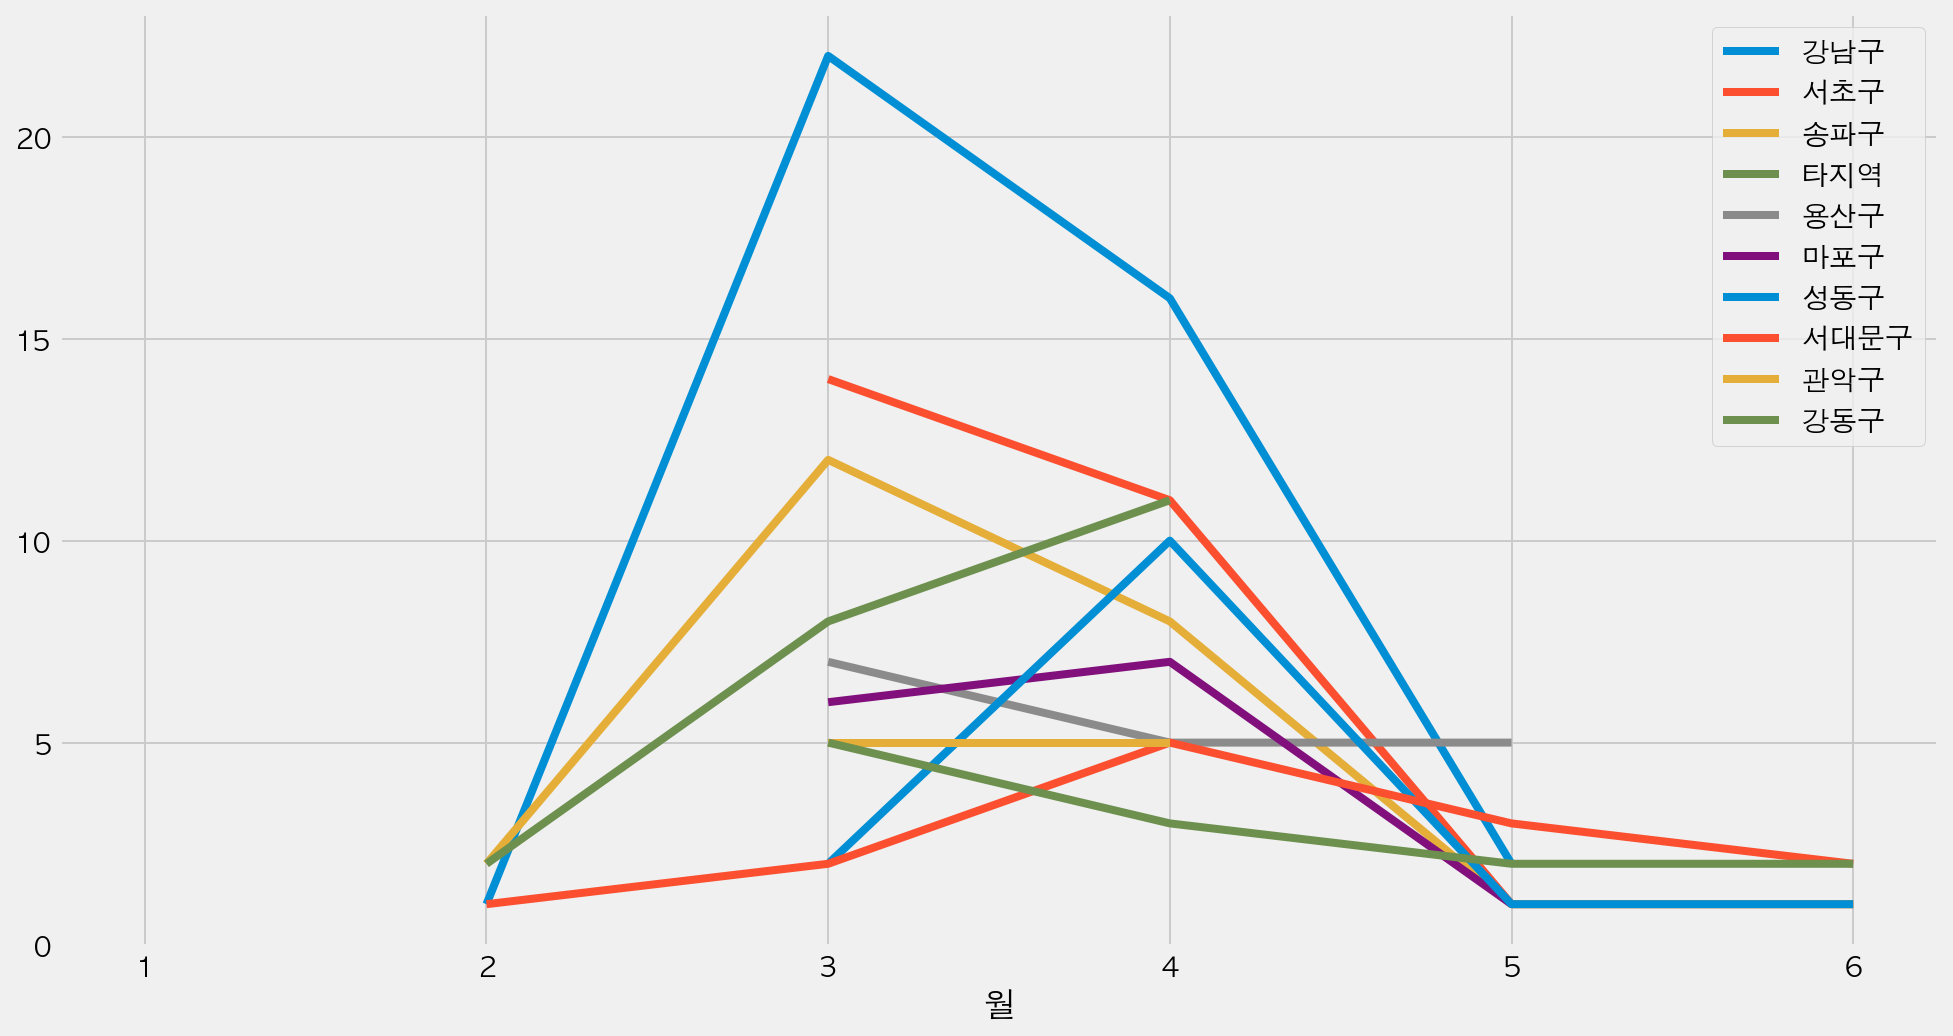

In [100]:
month_gu.loc[top_gu].T.plot(figsize=(15, 8))

In [101]:
df_oversea.loc[df_oversea["구"].isin(["강남구", "서초구", "송파구"]), "해외"].value_counts()

미국       48
유럽       31
남미        4
UAE       1
인도네시아     1
일본        1
필리핀       1
포르투칼      1
방글라데시     1
태국        1
싱가포르      1
러시아       1
Name: 해외, dtype: int64

In [102]:
from wordcloud import WordCloud

def wordcloud(data, width=1200, height=600):
    word_draw = WordCloud(font_path='/Library/Fonts/NanumBarunGothic.ttf',
                                    width = width, height = height, 
                                    background_color="#FFFFFF",
                                    random_state=42,
                                   ).generate(data)

    plt.figure(figsize=(15,10))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show() 

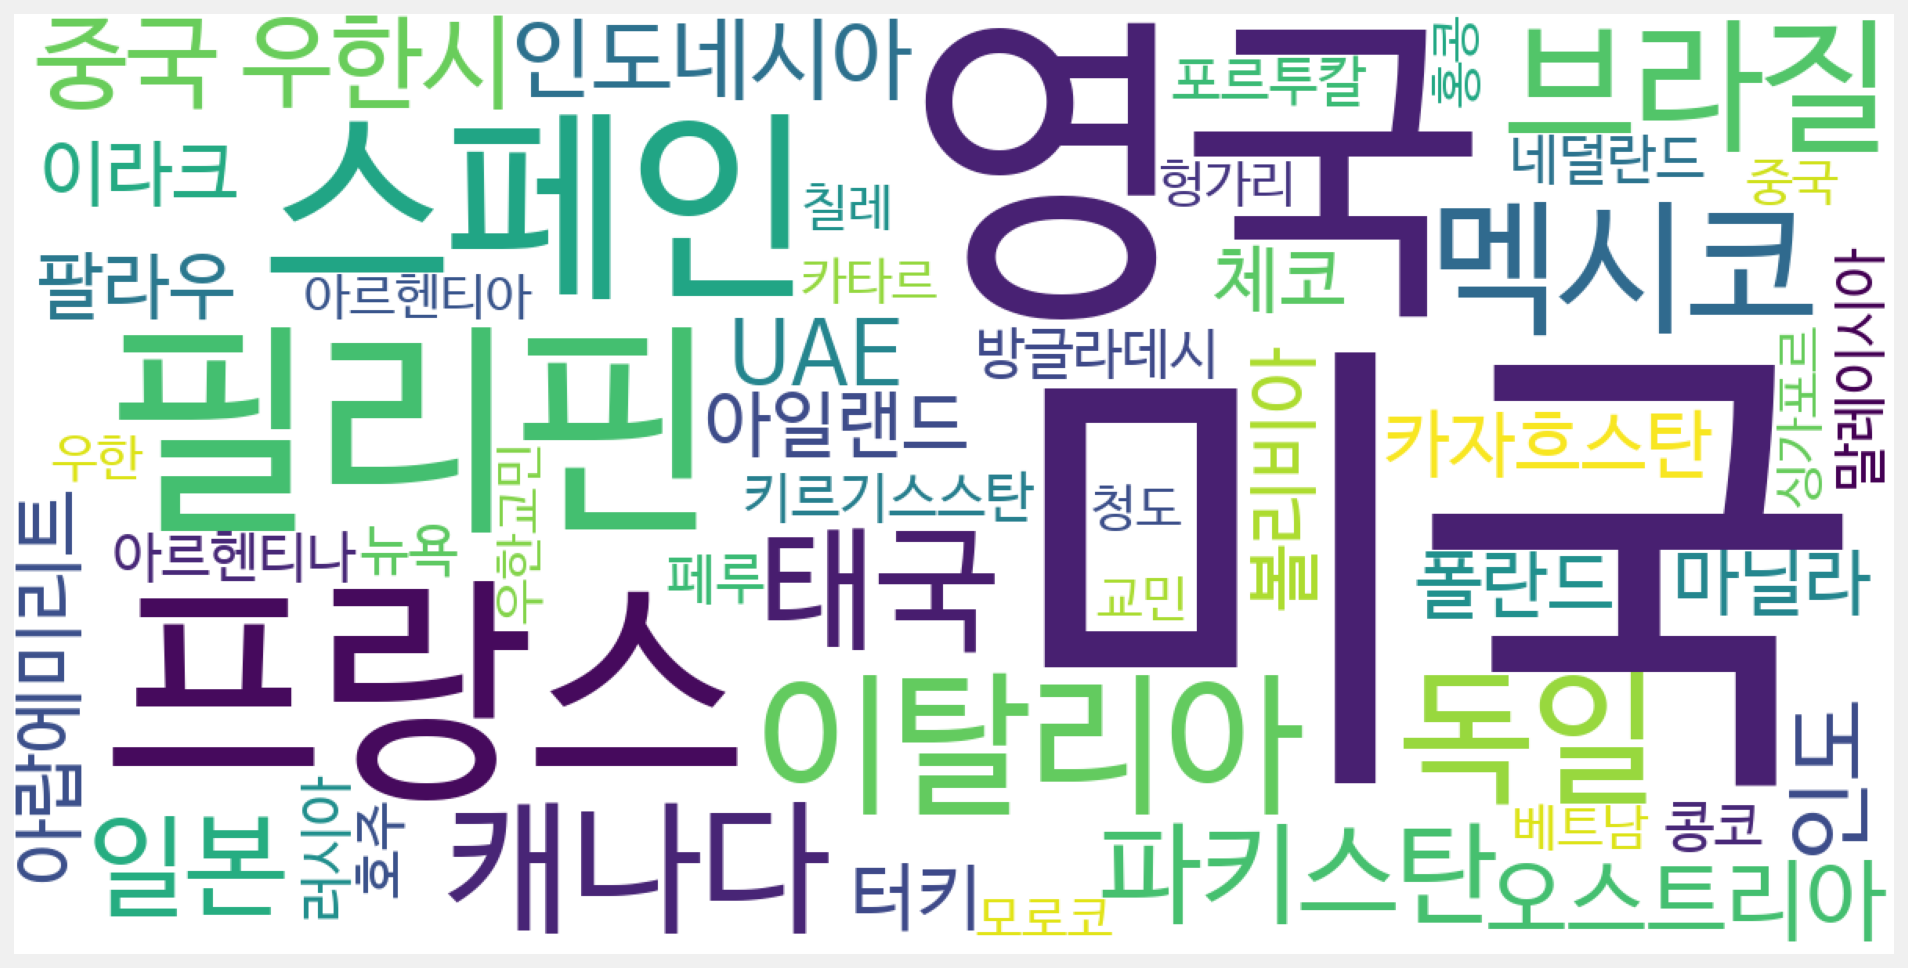

In [103]:
wordcloud(" ".join(df_oversea["여행력"]))

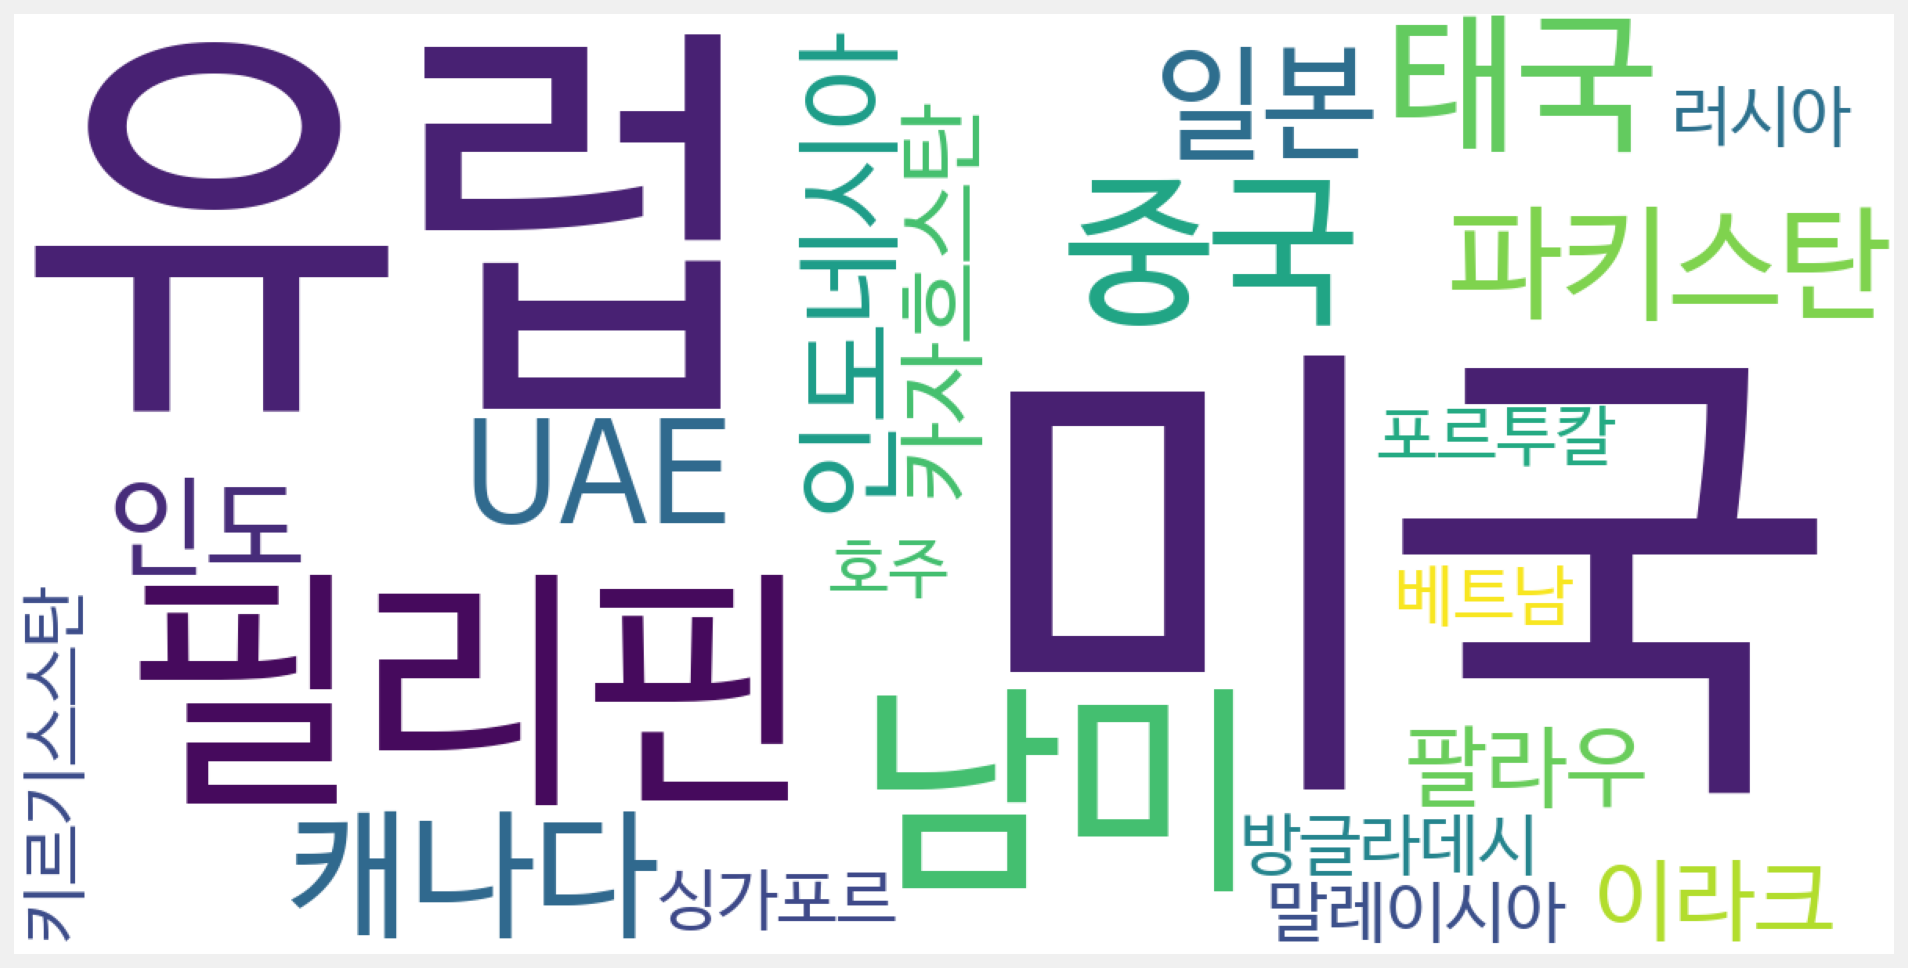

In [104]:
wordcloud(" ".join(df_oversea["해외"]))